# Rainfall Weather Forecasting

## Project Description

<B> Here, predict two things:<B>
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


### Importing Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

##### Importing Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0              W           44.0          W        WNW          20.0   
1            WNW           44.0        NNW        WSW           4.0   
2            WSW           46.0          W        WSW          19.0   
3             NE           24.0         SE          E          11.0   
4              W           41.0        ENE         NW           7.0   
...          ...            ...        ...        ...           ...   
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN            NaN        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0          8.0       NaN     16.9     21.8        No           No  
1          NaN       NaN     17.2     24.3        No           No  
2          NaN       2.0     21.0     23.2        No           No  
3          NaN       NaN     18.1     26.5        No           No  
4          7.0       8.0     17.8     29.7        No           No  
...        ...       ...      ...      ...       ...          ...  
8420       NaN       NaN     10.1     22.4        No           No  
8421       NaN       NaN     10.9     24.5        No           No  
8422       NaN       NaN     12.5     26.1        No           No  
8423       3.0       2.0     15.1     26.0        No           No  
8424       8.0       8.0     15.0     20.9        No          NaN  

[8425 rows x 23 columns]

- So here we can observe that the dataset contains the details of the WEATHER details .
- In the dataset "Rainfall" and "RainTomorrow" is the target variable which seems to be having 2 classes so it will be termed to be a "Classification Problem" and "Regression problem" where we need to predict whether the Rain come or not .
- The dataset contains both numerical and categorical columns.

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [4]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
8420           E           31.0         SE        ENE          13.0   
8421         NNW           22.0         SE          N          13.0   
8422           N           37.0         SE        WNW           9.0   
8423          SE           28.0        SSE          N          13.0   
8424         NaN            NaN        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
8420       NaN       NaN     10.1     22.4        No           No  
8421       NaN       NaN     10.9     24.5        No           No  
8422       NaN       NaN     12.5     26.1        No           No  
8423       3.0       2.0     15.1     26.0        No           No  
8424       8.0       8.0     15.0     20.9        No          NaN

In [5]:
df.shape

(8425, 23)

- The dataset contains 8425 rows and 23 columns .

Out of 23 columns 21 are independent features and remaining 2 is our target column that is 'RainToday' and "RainTomorrow"

# Exploratory Data Analysis(EDA)

In [6]:
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

there is null columns present in the dataset. also its tells about datatypes

Date datatype should be "datetime"  dtype , lets handle it.

- The dataset contains 2 types of data namely float type and object type.

We will convert this object type data into numerical using encoding techniquies before building the model

### Handle Date Dtypes

In [8]:
import datetime as dt

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df.drop(['Date'],axis=1,inplace=True)
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  day  month  year  
0     16.9     21.8        No           No    1     12  2008  
1     17.2     24.3        No           No    2     12  2008  
2     21.0     23.2        No           No    3     12  2008  
3     18.1     26.5        No           No    4     12  2008  
4     17.8     29.7        No           No    5     12  2008

In [10]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
day                int64
month              int64
year               int64
dtype: object

Date column Dtypes has been changed

## checking null values

In [11]:
df.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
day                 0
month               0
year                0
dtype: int64

In the above cell we can see that most of the columns have null values present in them that will need to be deal with.

### % of Null value present in the dataset

In [12]:
n=(df.isnull().sum()/(len(df)))*100
np.round(n,2)

Location          0.00
MinTemp           0.89
MaxTemp           0.71
Rainfall          2.85
Evaporation      41.69
Sunshine         47.41
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
WindSpeed9am      0.90
WindSpeed3pm      1.27
Humidity9am       0.70
Humidity3pm       1.21
Pressure9am      15.54
Pressure3pm      15.57
Cloud9am         28.74
Cloud3pm         29.14
Temp9am           0.66
Temp3pm           1.14
RainToday         2.85
RainTomorrow      2.84
day               0.00
month             0.00
year              0.00
dtype: float64

### % of Null value present in the dataset - chart view

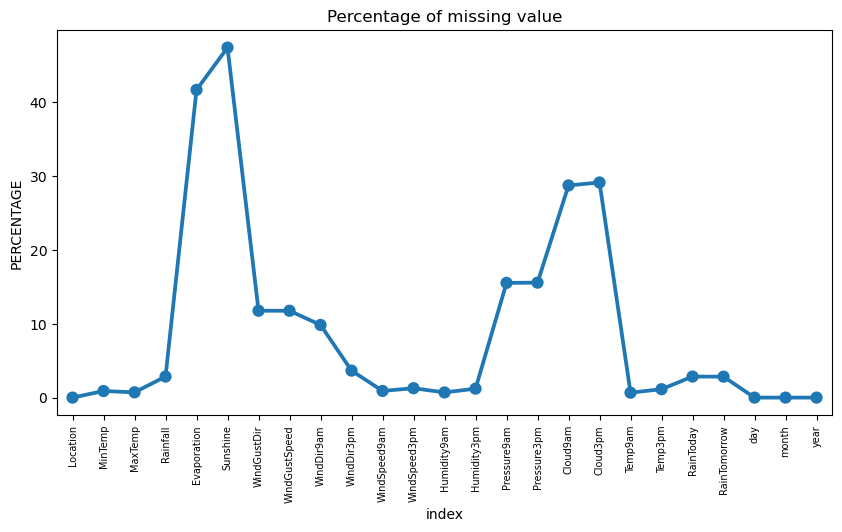

In [13]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()

plt.figure(figsize=(10,5))

ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)

plt.ylabel('PERCENTAGE')
plt.title('Percentage of missing value')

plt.show()

### visual representation of Null values- Row location

<AxesSubplot:>

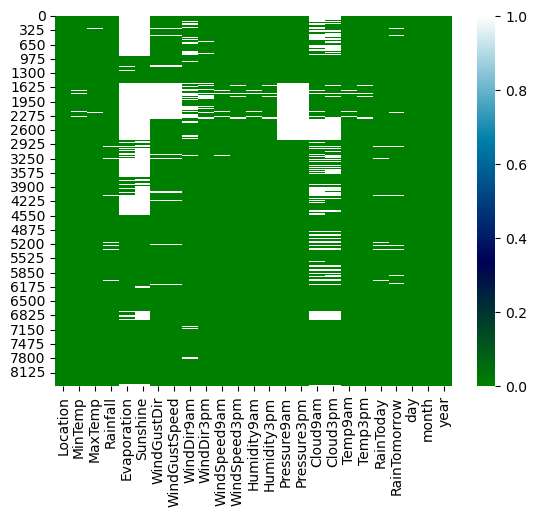

In [14]:
sns.heatmap(df.isnull(),cmap='ocean')

the white line meant there is missing value in the dataset at their position

<AxesSubplot:>

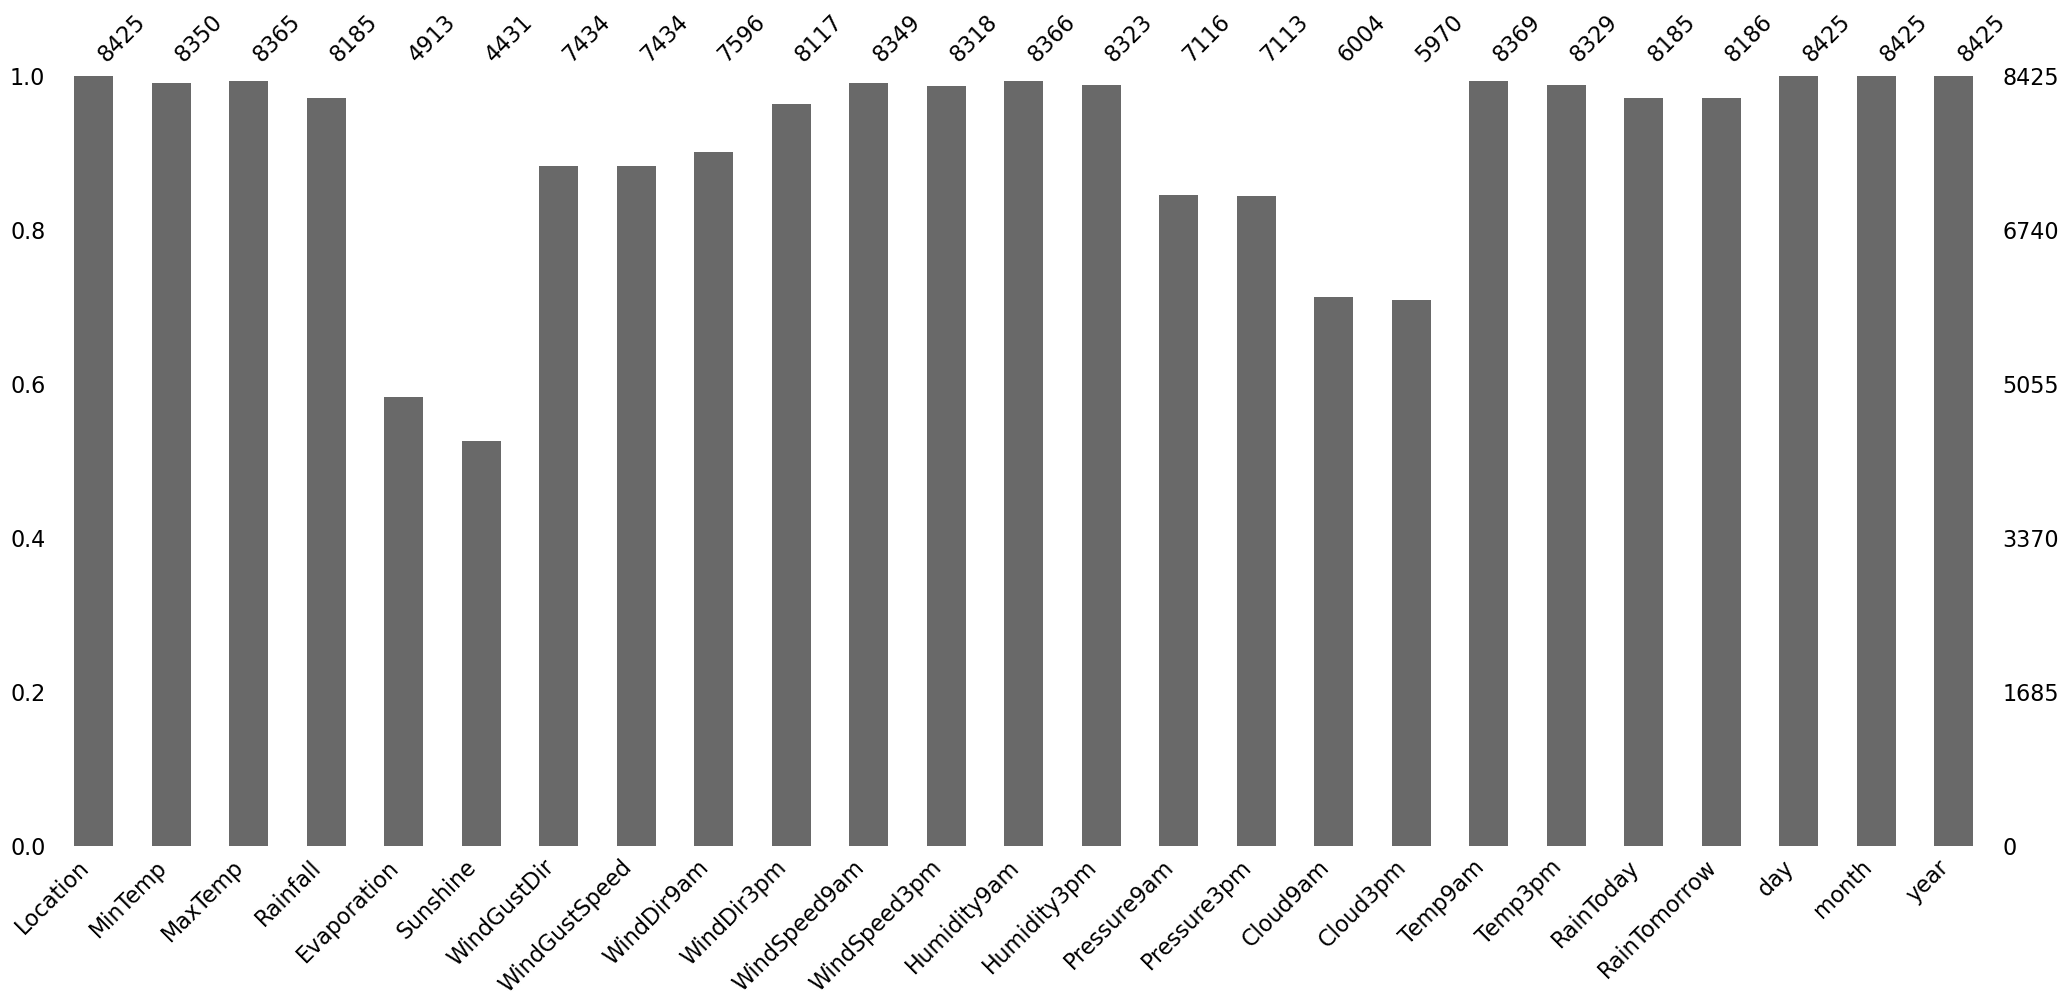

In [15]:
ms.bar(df)

So after getting a visual on the missing values we see that our dataset columns have null values present in them..

<AxesSubplot:>

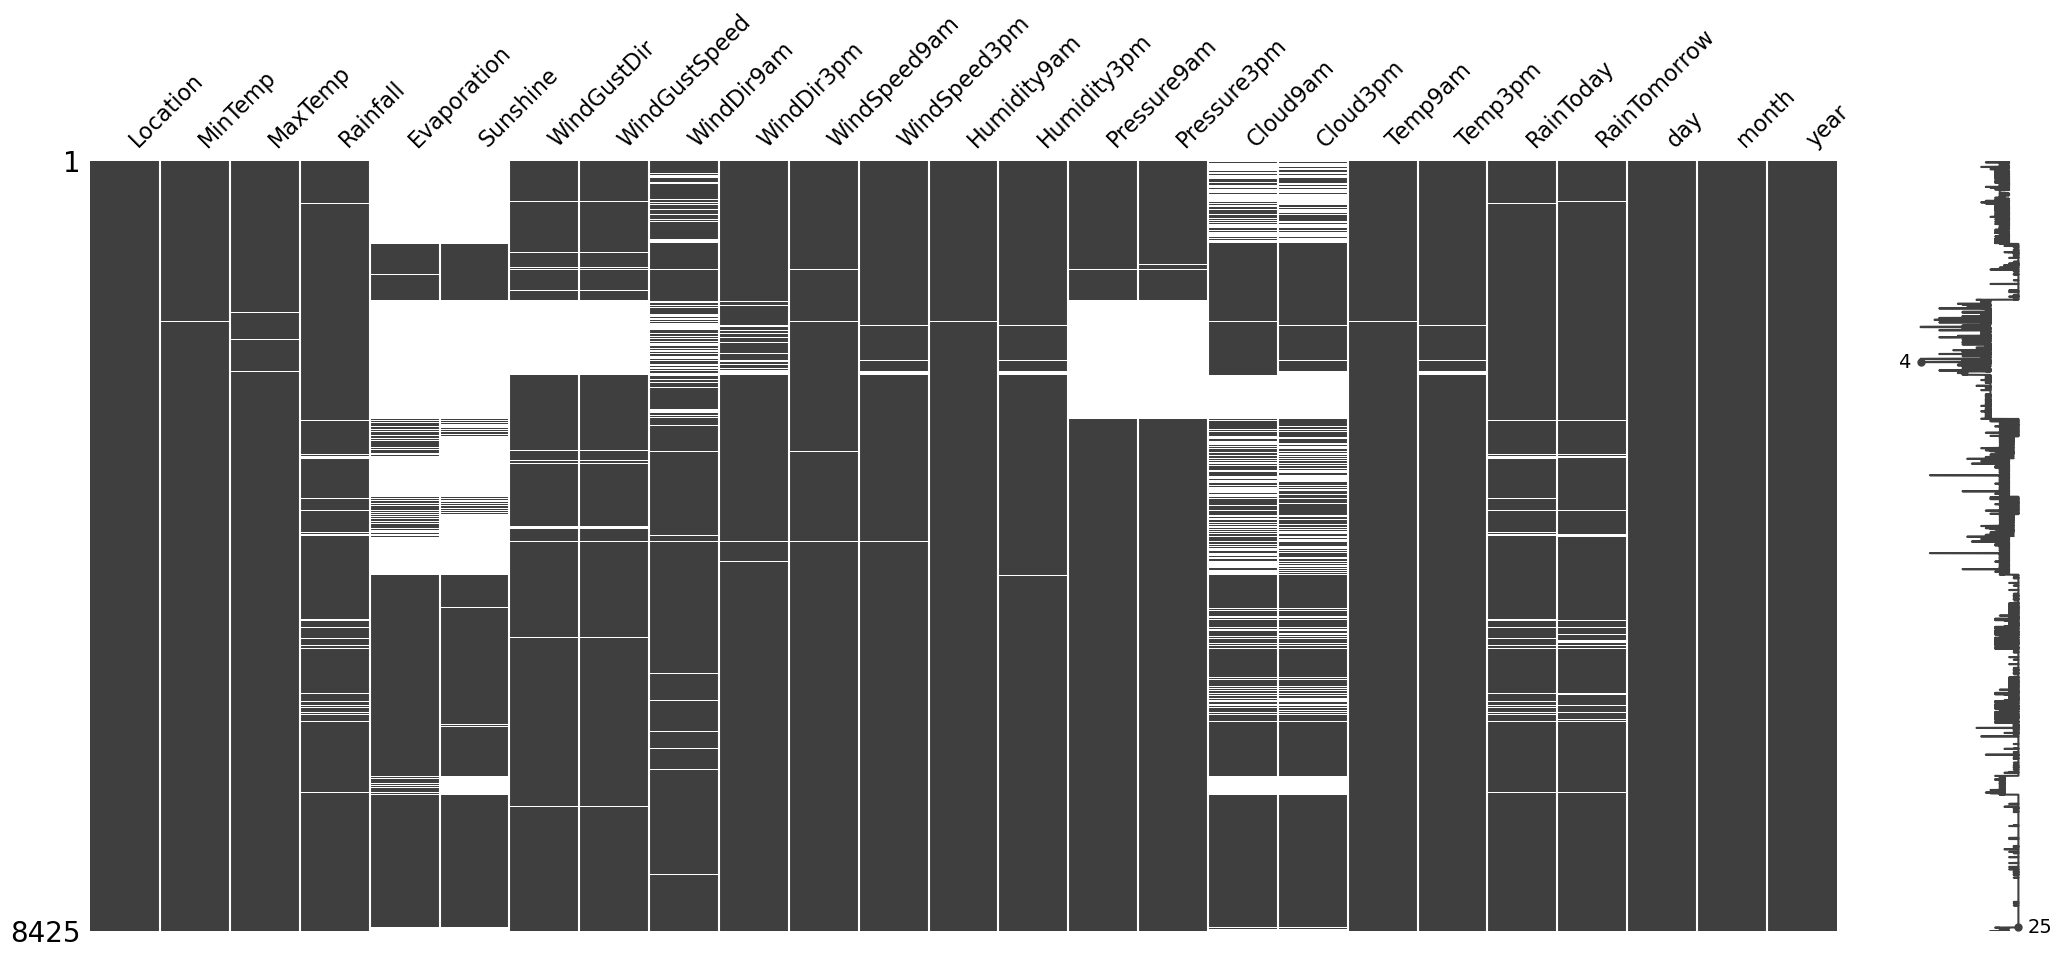

In [16]:
ms.matrix(df)

missing value highlighted visually

### Treating Null values in the dataset

In [17]:
##Mode imputation is used when dealing with categorical data
##Mean imputation is used when the distribution of the data is normal & missing values are random
##Median imputation is appropriate when the distribution of the data is skewed

#CATEGORIAL COLUMN
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

#NUMERICAL COLUMN
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

### checking after clear the null values

In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

### checking unique values

In [19]:
df.nunique()

Location          12
MinTemp          286
MaxTemp          332
Rainfall         251
Evaporation      117
Sunshine         141
WindGustDir       16
WindGustSpeed     53
WindDir9am        16
WindDir3pm        16
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      385
Pressure3pm      375
Cloud9am          10
Cloud3pm          10
Temp9am          305
Temp3pm          329
RainToday          2
RainTomorrow       2
day               31
month             12
year              10
dtype: int64

# Value Count Function

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset.

In [20]:
for i in df.columns:
    print(df[i].value_counts())
    print('='*99)

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
-1.100000      1
 1.400000      1
-1.400000      1
-1.700000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: MaxTemp, Length: 332, dtype: int64
0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64
5.389395     3512
4.000000      180
3.000000      163
2.400000      147
2.2000

From above we can see all the values present in the object columns and their frequency.

In [21]:
# let's check the dataframe
df.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   
2   Albury     12.9     25.7       0.0     5.389395  7.632205         WSW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1         44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2         38.0         30.0       1007.6       1008.7  4.566622  2.000000   

   Temp9am  Temp3pm RainToday RainTomorrow  day  month  year  
0     16.9     21.8        No           No    1     12  2008  
1     17.2     24.3        No           No    2     12  2008  
2     21.0     23.2        No           No    3     12  2008

In [22]:
df.tail(3)

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
8422    Uluru      5.4  26.900000       0.0     5.389395  7.632205   
8423    Uluru      7.8  27.000000       0.0     5.389395  7.632205   
8424    Uluru     14.9  23.859976       0.0     5.389395  7.632205   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
8422           N      37.000000         SE        WNW           9.0   
8423          SE      28.000000        SSE          N          13.0   
8424           N      40.174469        ESE        ESE          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  day  month  \
8422  4.566622  4.503183     12.5     26.1        No           No   23      6   
8423  3.000000  2.000000     15.1     26.0        No           No   24      6   
8424  8.000000  8.000000     15.0     20.9        No           No   25      6   

      year  
8422  2017  
8423  2017  
8424  2017

In [119]:
# checking the list of value counts in Target column
df['RainTomorrow'].value_counts()

0    5190
1    1572
Name: RainTomorrow, dtype: int64

- There are two unique values in the target columns No and Yes.

We can say that whether the rain will come tomorrow is Yes or No

We can also observe that the class imbalancing issue here so will balance the data using SMOTE before machine learning modeling.

## find duplicate values

In [24]:
df.duplicated().sum()

1663

### Removing duplicated values

In [25]:
duplicate = df[df.duplicated()]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


Location  MinTemp  MaxTemp   Rainfall  Evaporation   Sunshine  \
3674  Williamtown     13.1     31.6   0.000000     6.400000  11.100000   
3675  Williamtown     16.6     34.1   0.000000     6.600000   9.900000   
3676  Williamtown     17.5     26.3  19.800000     7.800000   7.632205   
3677  Williamtown     14.7     21.4   2.805913     5.389395   7.632205   
3678  Williamtown     11.0     22.5   2.805913     5.389395   7.632205   
...           ...      ...      ...        ...          ...        ...   
6143    Melbourne     20.3     25.0   0.000000    11.600000   7.300000   
6144    Melbourne     16.1     24.5   0.000000     4.400000  12.400000   
6145    Melbourne     16.6     30.7   2.805913     8.000000  13.000000   
6146    Melbourne     20.0     30.4   2.805913     8.200000  12.100000   
6147    Melbourne     20.5     34.9   2.805913     9.400000   9.200000   

     WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
3674           E           33.0          N          E          11.0   
3675         NNW           44.0         NW        ESE          15.0   
3676          SW           67.0          N        WNW           0.0   
3677           S           59.0        WSW        SSW          20.0   
3678           E           35.0         NW          E          11.0   
...          ...            ...        ...        ...           ...   
6143           S           39.0          S        SSW          17.0   
6144           S           50.0          S          S          13.0   
6145         SSE           39.0        WSW        SSE           9.0   
6146         SSE           37.0         SW          S          13.0   
6147           N           59.0         NE        NNE           9.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
3674          22.0         67.0         37.0       1021.4       1016.4   
3675          22.0         54.0         39.0       1014.7       1010.6   
3676          11.0         94.0         45.0       1012.4       1008.3   
3677          30.0         90.0         48.0       1021.4       1020.9   
3678          20.0         65.0         60.0       1024.5       1021.4   
...            ...          ...          ...          ...          ...   
6143          17.0         77.0         60.0       1015.2       1014.0   
6144          31.0         67.0         55.0       1018.5       1016.9   
6145          19.0         69.0         55.0       1016.9       1013.5   
6146          26.0         64.0         55.0       1012.7       1009.2   
6147          15.0         68.0         33.0       1007.1       1000.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  day  month  \
3674  1.000000  1.000000     21.5     30.3        No           No   20     10   
3675  1.000000  5.000000     24.7     30.2        No          Yes   21     10   
3676  8.000000  6.000000     18.6     25.6       Yes           No   22     10   
3677  7.000000  5.000000     15.6     20.3        No           No   23     10   
3678  4.566622  4.503183     18.4     21.4        No          Yes   24     10   
...        ...       ...      ...      ...       ...          ...  ...    ...   
6143  8.000000  2.000000     20.8     23.8        No           No   25      1   
6144  4.566622  4.503183     18.9     23.7        No           No   26      1   
6145  4.566622  4.503183     20.5     26.3        No           No   27      1   
6146  4.566622  4.503183     24.1     27.4        No           No   28      1   
6147  4.566622  4.503183     24.6     34.0        No          Yes   29      1   

      year  
3674  2015  
3675  2015  
3676  2015  
3677  2015  
3678  2015  
...    ...  
6143  2012  
6144  2012  
6145  2012  
6146  2012  
6147  2012  

[1663 rows x 25 columns]

In [26]:
df.shape

(8425, 25)

In [27]:
df=df.drop_duplicates()
df.shape

(6762, 25)

after removal of duplicated values data shape has been changed.

In [28]:
df.duplicated().sum()

0

## seperate the data columns

In [29]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


Numerical Variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'day', 'month', 'year']


## Descriptive Statistics

In [30]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean     13.110016    24.096335     2.780674     5.339977     7.767098   
std       5.540673     6.130161    10.482770     3.343991     2.736693   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.600000     0.000000     4.000000     7.632205   
50%      13.193305    23.500000     0.000000     5.389395     7.632205   
75%      17.400000    28.400000     1.200000     5.389395     9.200000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    6762.000000   6762.000000   6762.000000  6762.000000  6762.000000   
mean       39.144388     12.792133     17.585384    67.509082    50.478258   
std        13.382876      9.788112      9.549341    17.182723    18.498573   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    38.000000   
50%        39.000000     11.000000     17.000000    68.000000    50.000000   
75%        46.000000     19.000000     24.000000    80.000000    62.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean   1017.629004  1015.142442     4.400224     4.372235    17.894035   
std       6.027916     5.967815     2.476781     2.324720     5.722423   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.200000  1011.500000     2.000000     3.000000    13.900000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.900000   
75%    1020.900000  1018.400000     7.000000     6.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm          day        month         year  
count  6762.000000  6762.000000  6762.000000  6762.000000  
mean     22.704947    15.737208     6.462141  2012.052203  
std       5.971925     8.793898     3.377471     2.301057  
min       7.300000     1.000000     1.000000  2008.000000  
25%      18.400000     8.000000     4.000000  2010.000000  
50%      22.300000    16.000000     6.000000  2012.000000  
75%      26.800000    23.000000     9.000000  2014.000000  
max      44.100000    31.000000    12.000000  2017.000000

This gives the statistical information of the dataset . The summary of this dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following things.

- The counts of all the columns are same which means there is no missing values present in any columns
- The mean is greater than the median(50%) in some columns which means they are skewed to right.
- The mean and the median(50%) are almost equal in some columns  which means the data is symmetric in these columns hence the data is normal and no skewness present here.
- There is a huge difference in 75% and max it shows that huge outliers present in the columns.
- In summarising the data we can observe that the dataset contains year between 2008 to 2017

### Checking Description through heatmap also.

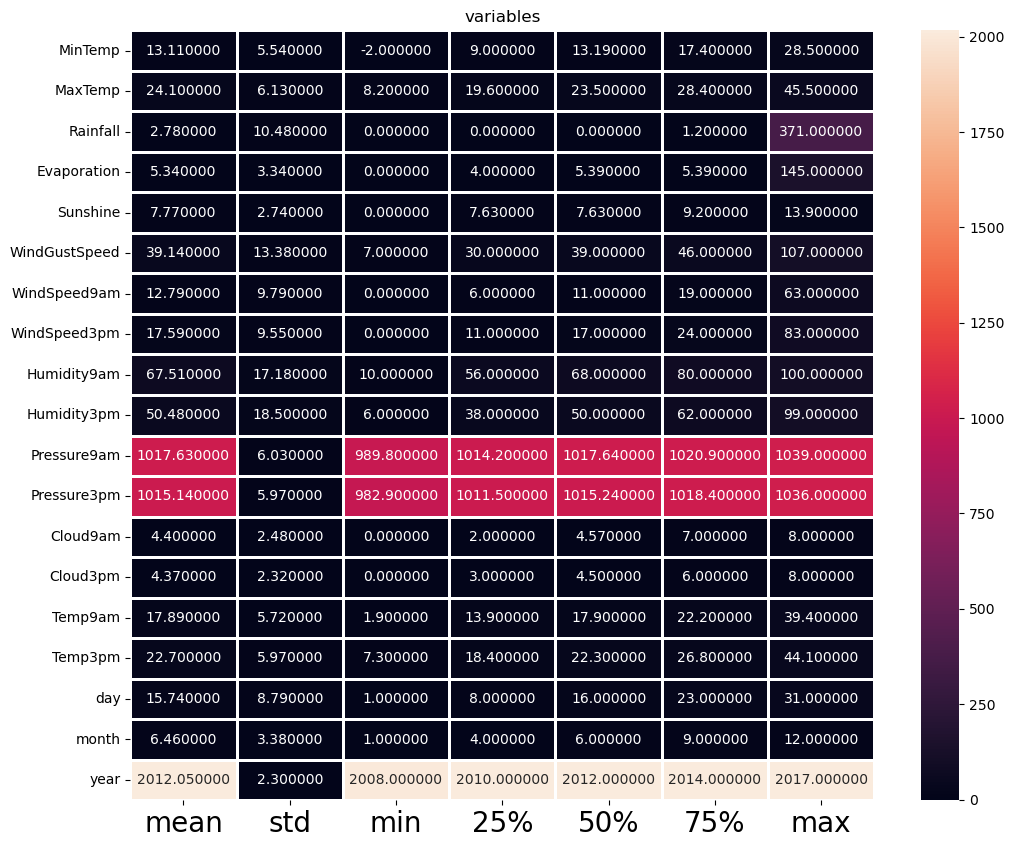

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt='f')
plt.xticks(fontsize=25)
plt.xticks(fontsize=20)
plt.title('variables')
plt.show()

#### Observation of Describe of Datasets:

- We observe from description of dataset that there are 6762 rows and  25 columns, in which 19 columns contains Continuous data and 6 columns contains Categorical data.
- There are negative value present in dataset also data is not normally distributed and also skewness is present.
- we will check for value 0, as 0 value is also null value but it is value that why while checking for null value it is not counted.

In [32]:
df.describe(include='object')

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
count           6762        6762       6762       6762      6762         6762
unique            12          16         16         16         2            2
top     PerthAirport           N          N         SE        No           No
freq            1204        1401       1403        971      5190         5190

From above desribe function we are describing the data from all the object type columns and we notice the following-

1) Unique values in each columns
2) Most frequent value in each column. (mode)
3) Frequency of the most occuring value.

In [33]:
df.shape

(6762, 25)

## Data Visualization

### Univariate Analysis

### Using Countplot for categorical columns

In [34]:
df.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6     5.389395  7.632205           W   
1   Albury      7.4     25.1       0.0     5.389395  7.632205         WNW   
2   Albury     12.9     25.7       0.0     5.389395  7.632205         WSW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1         44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2         38.0         30.0       1007.6       1008.7  4.566622  2.000000   

   Temp9am  Temp3pm RainToday RainTomorrow  day  month  year  
0     16.9     21.8        No           No    1     12  2008  
1     17.2     24.3        No           No    2     12  2008  
2     21.0     23.2        No           No    3     12  2008

In [35]:
df_cat=df.drop(columns=num_cols,axis=1)
df_n=df.drop(columns=cat_cols,axis=1)

Count Plot for  Location  column
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


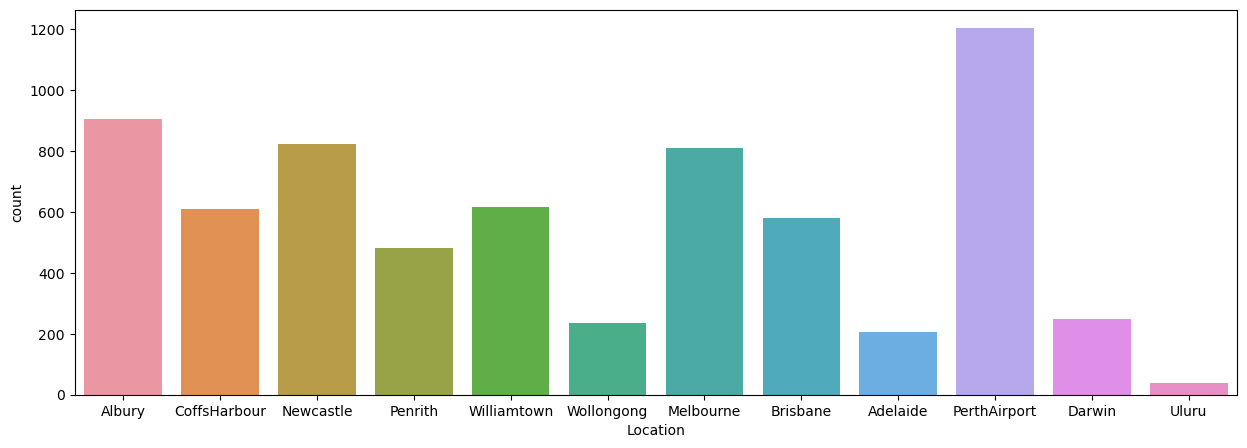

Count Plot for  WindGustDir  column
N      1401
E       518
SW      465
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64


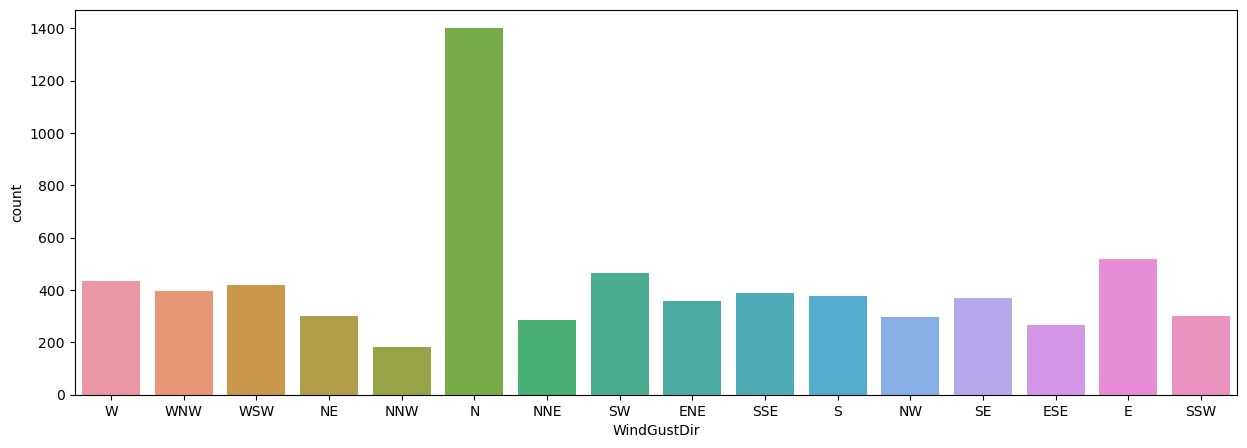

Count Plot for  WindDir9am  column
N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64


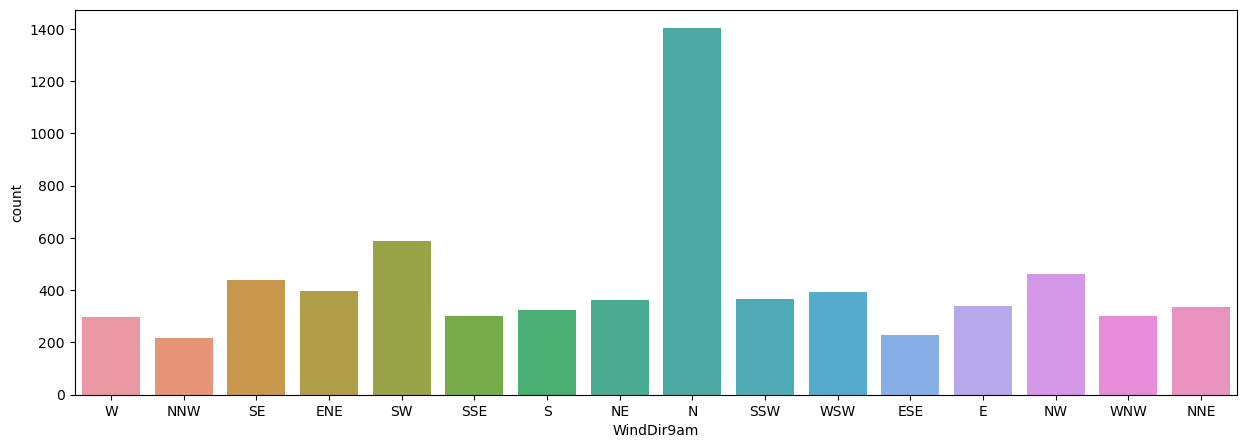

Count Plot for  WindDir3pm  column
SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64


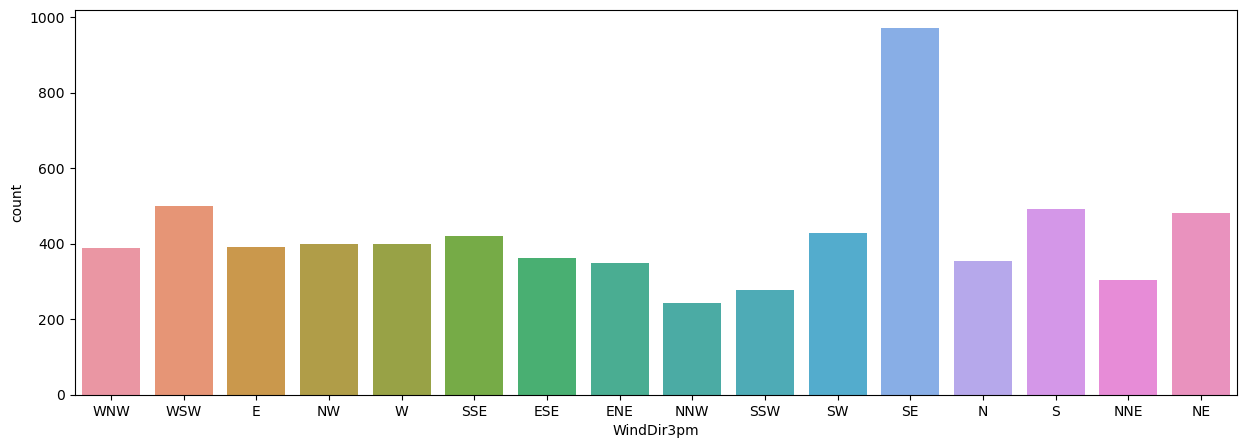

Count Plot for  RainToday  column
No     5190
Yes    1572
Name: RainToday, dtype: int64


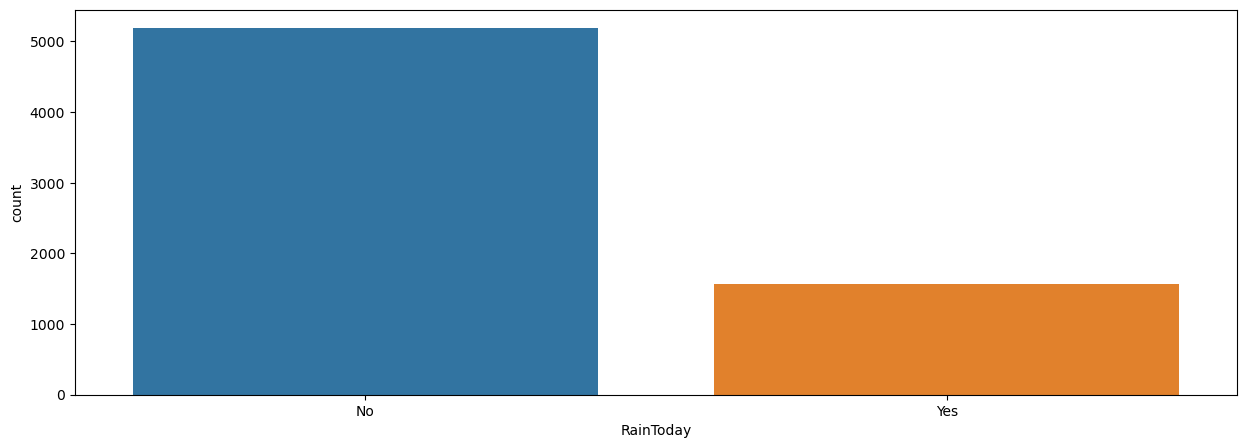

Count Plot for  RainTomorrow  column
No     5190
Yes    1572
Name: RainTomorrow, dtype: int64


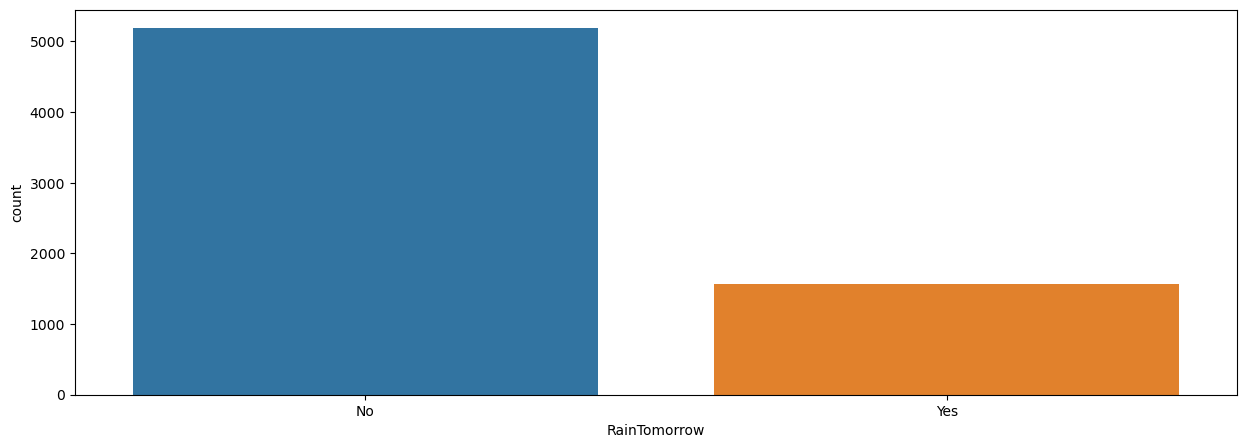

In [36]:
for i in df_cat:
    print('Count Plot for ',i,' column')
    plt.figure(figsize=(15,5))
    print(df[i].value_counts())
    sns.countplot(i,data=df_cat)
    print("="*100)
    plt.show()

In [37]:
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [38]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'day',
 'month',
 'year']

### (categorial column % wise spread)

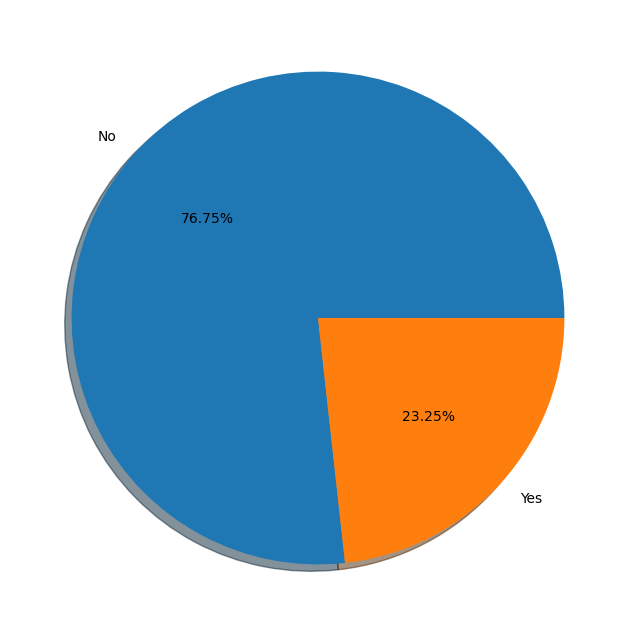

In [39]:
# visualize the count of Relationship of the people(categorial column % wise spread)
#labels = 'Location', 'WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday'
labels = "No","Yes"
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['RainToday'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

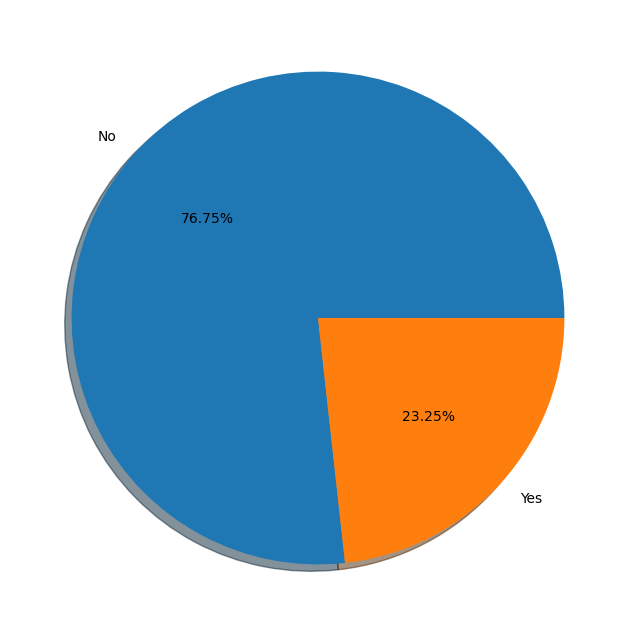

In [40]:
# visualize the count of Relationship of the people(categorial column % wise spread)
#labels = 'Location', 'WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday'
labels = "No","Yes"
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['RainTomorrow'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

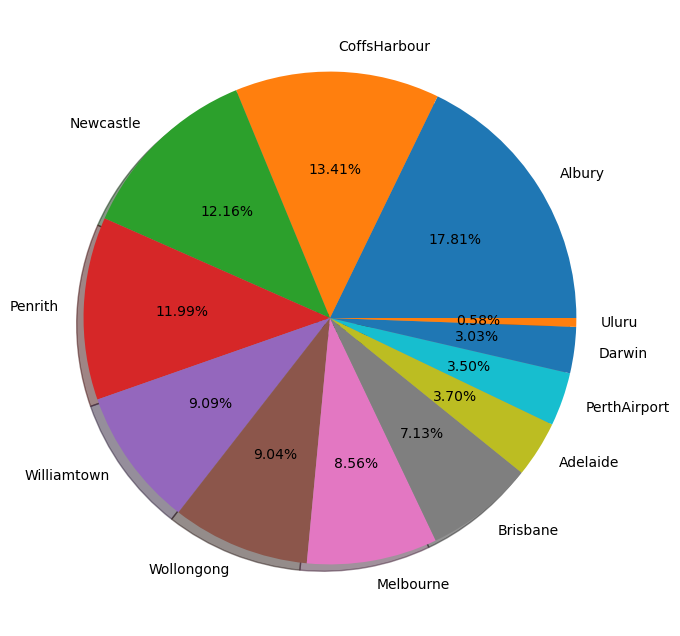

In [41]:
# visualize the count of Relationship of the people(categorial column % wise spread)
#labels = 'Location', 'WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday'
labels = 'Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown','Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport', 'Darwin', 'Uluru'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Location'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

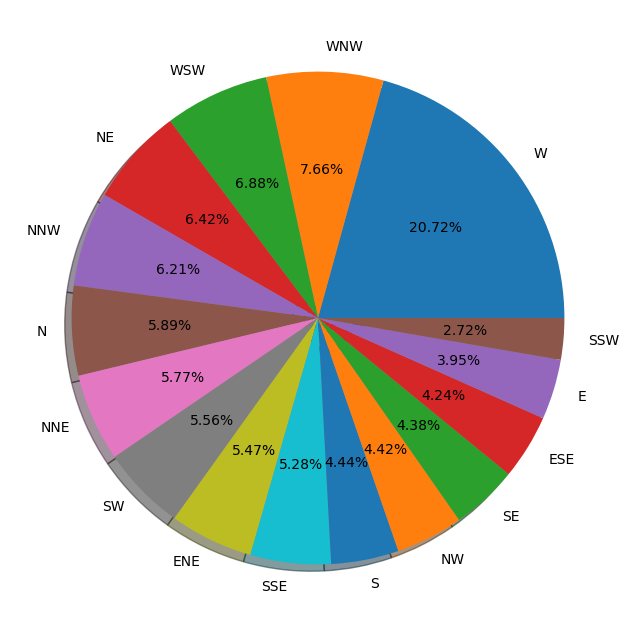

In [42]:
# visualize the count of Relationship of the people(categorial column % wise spread)
#labels = 'Location', 'WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday'
labels = 'W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE','S', 'NW', 'SE', 'ESE', 'E', 'SSW'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['WindGustDir'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

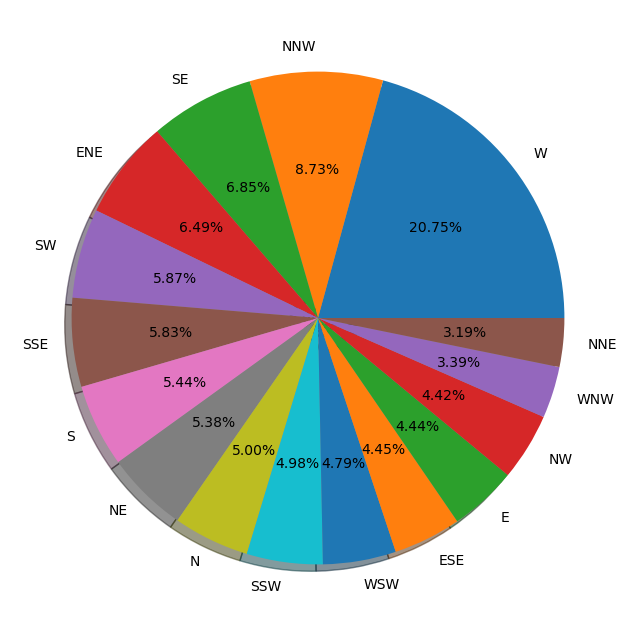

In [43]:
# visualize the count of Relationship of the people(categorial column % wise spread)
#labels = 'Location', 'WindGustDir','WindDir9am','WindDir3pm','RainTomorrow','RainToday'
labels = 'W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'N', 'SSW', 'WSW','ESE', 'E', 'NW', 'WNW', 'NNE'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['WindDir9am'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

### Using Histplot for continuous columns

In [ ]:
for j in df_n:
    print('#Histplot for ',j,' column')
    print(df_n[j].value_counts())
    plt.figure(figsize=(15,5))
    sns.histplot(x='j',data=df_n,bins=10)
    plt.show()
    print('='*100)

### Realtionship between Rainfall and Categorial column

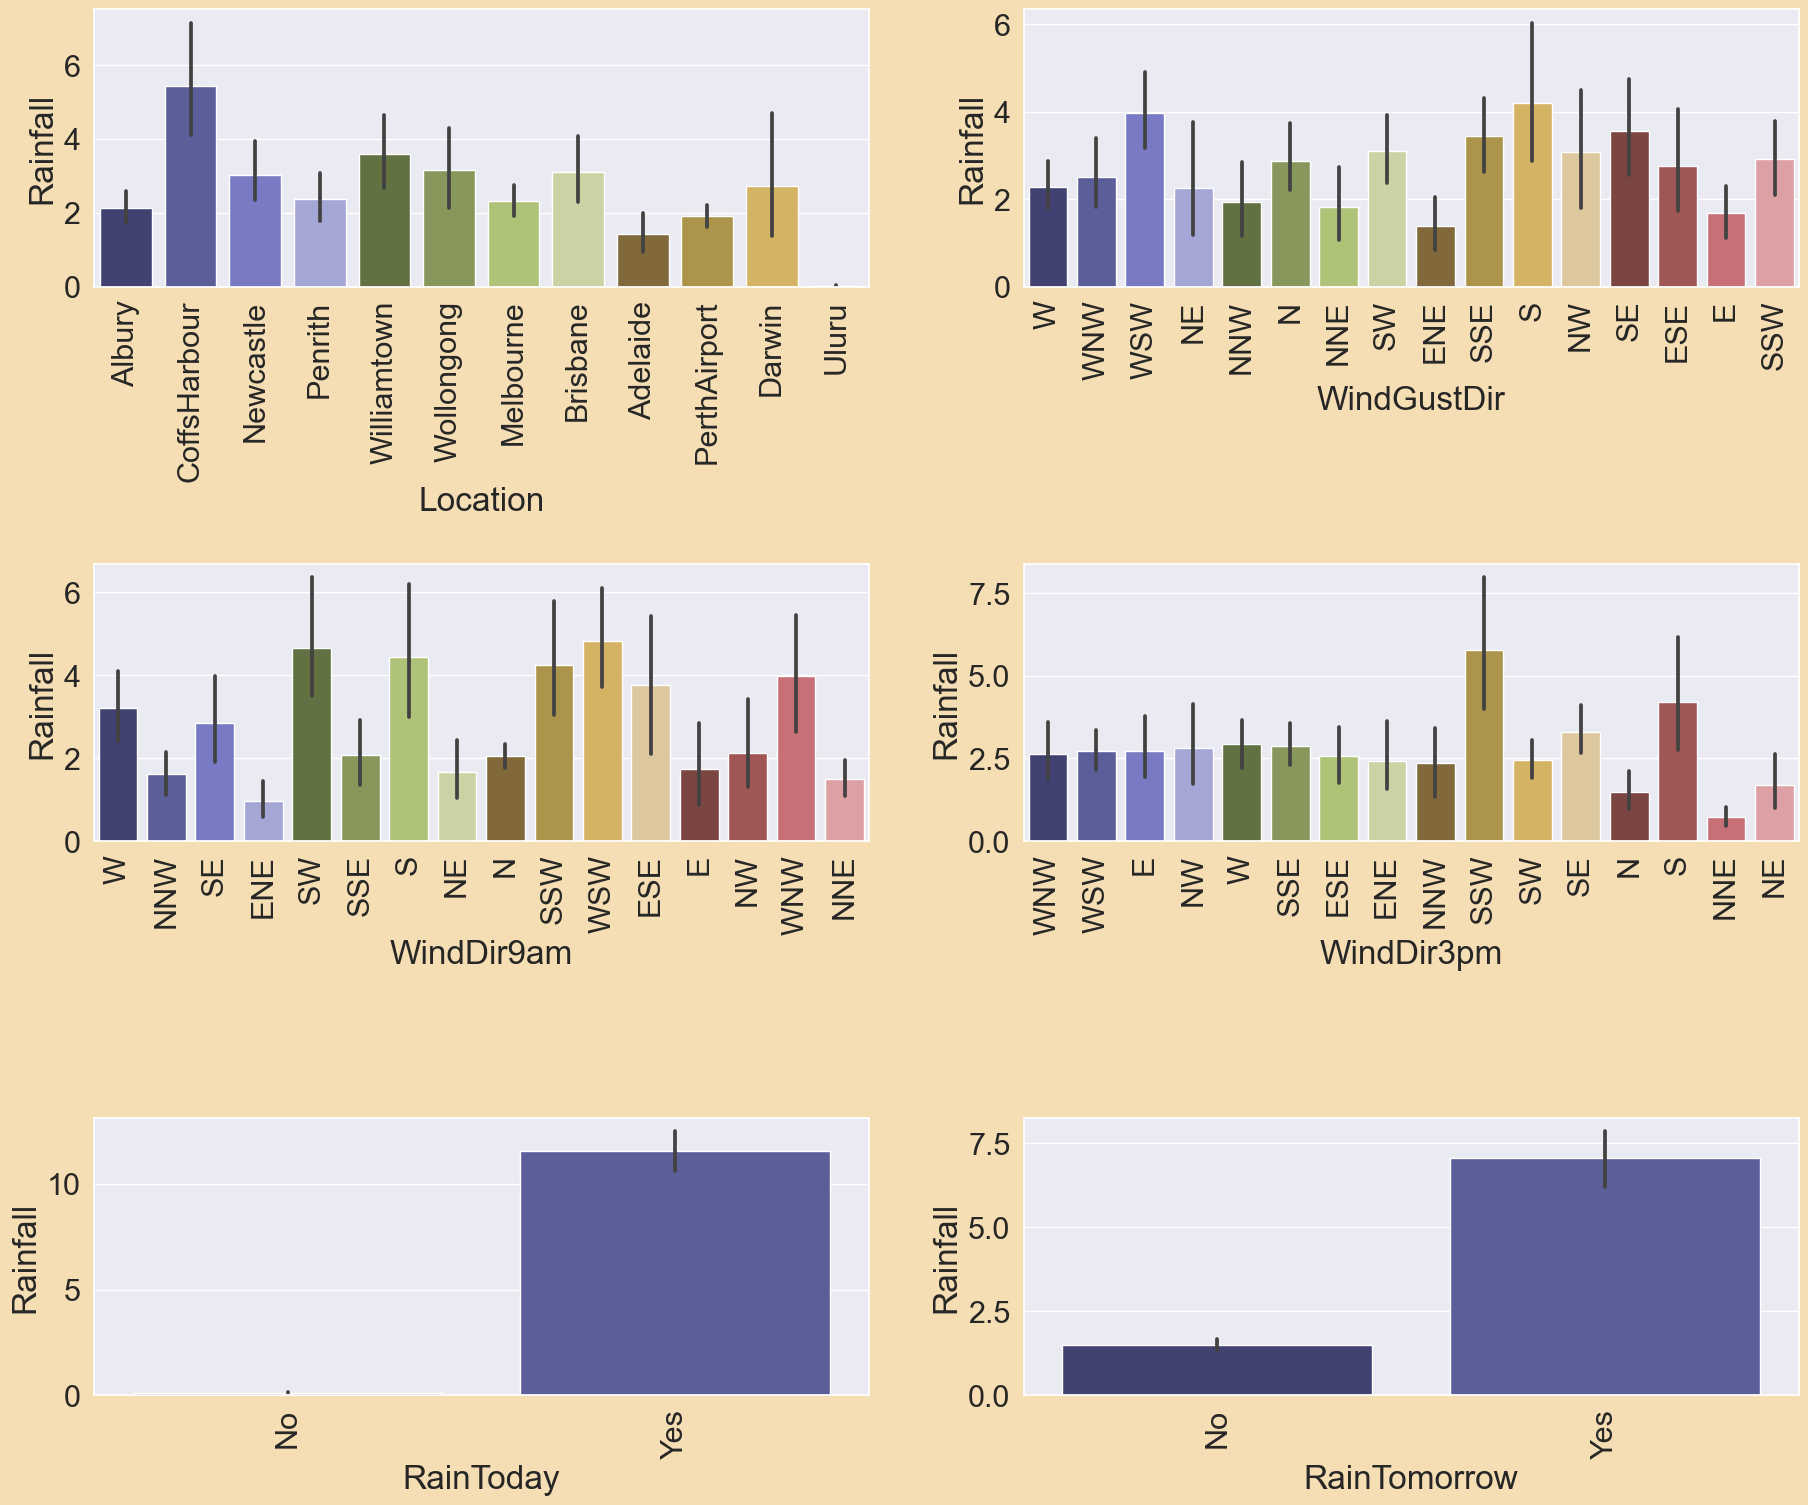

In [45]:
sns.set_style('darkgrid')
sns.set(font_scale=2)
plt.figure(facecolor='wheat',figsize=(22,18))
p=1
for i in cat_cols:
    if p<=9:
        ax=plt.subplot(3,2,p)
        sns.barplot(x=df[i],palette='tab20b',y='Rainfall',data=df)
        plt.xticks(rotation=90)
    p+=1
    
plt.subplots_adjust(hspace=1)
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='count'>

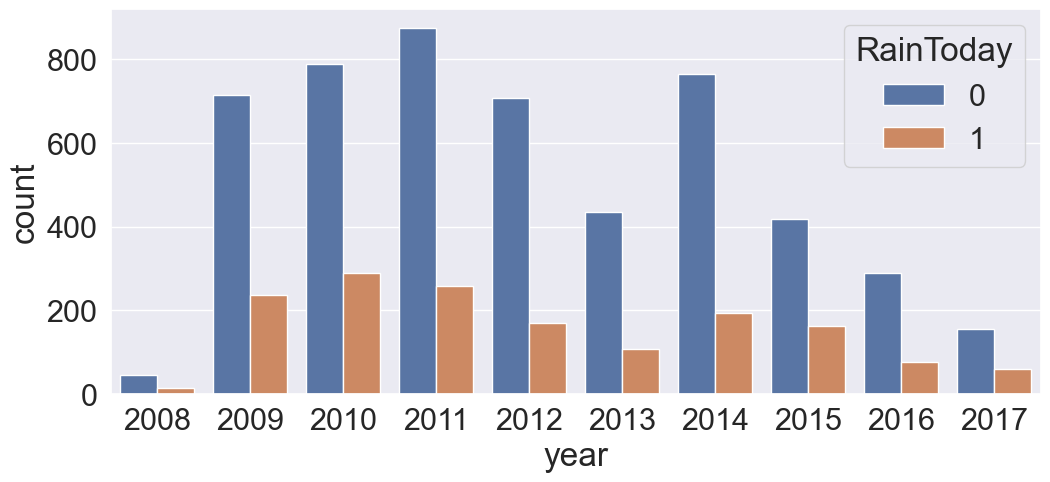

In [121]:
#Count Plot for comparision between "Year" column and "RainToday" column
plt.figure(figsize=(12,5))
sns.countplot("year",data=df, hue='RainToday')

<AxesSubplot:xlabel='year', ylabel='count'>

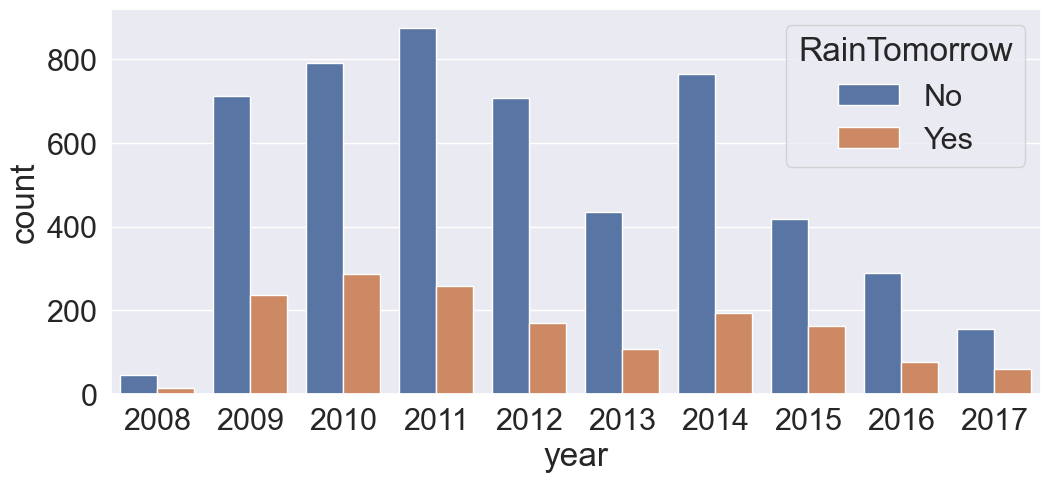

In [47]:
plt.figure(figsize=(12,5))
sns.countplot("year",data=df, hue='RainTomorrow')

<AxesSubplot:xlabel='month', ylabel='count'>

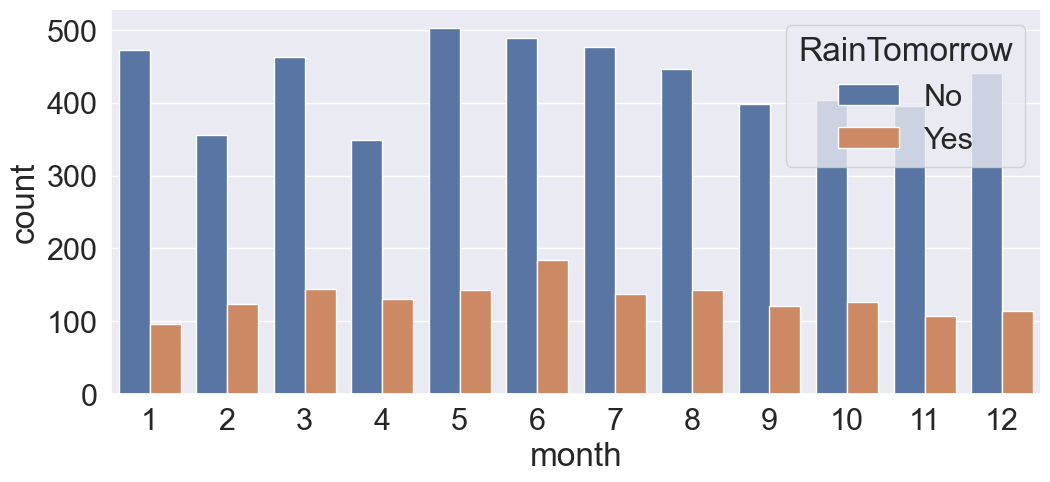

In [48]:
plt.figure(figsize=(12,5))
sns.countplot("month",data=df, hue='RainTomorrow')

<AxesSubplot:xlabel='month', ylabel='count'>

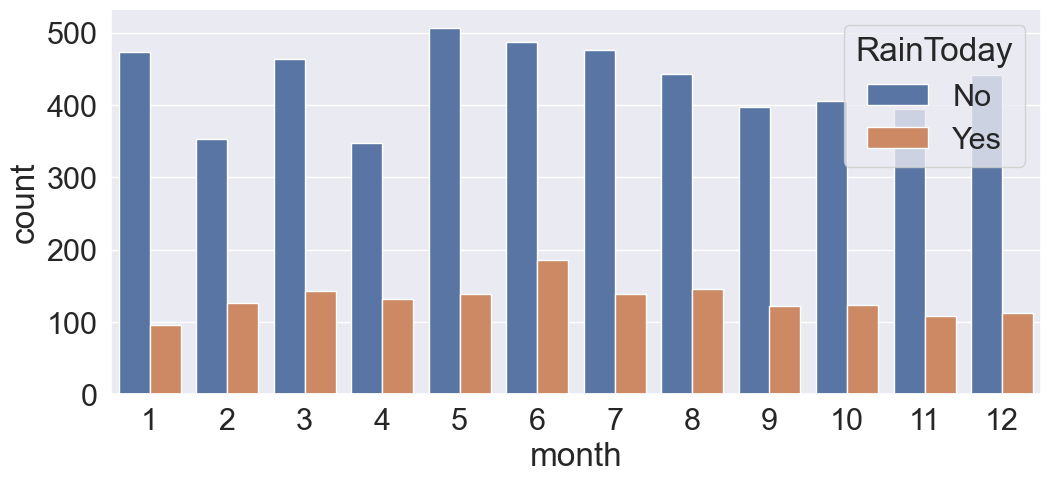

In [49]:
plt.figure(figsize=(12,5))
sns.countplot("month",data=df, hue='RainToday')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

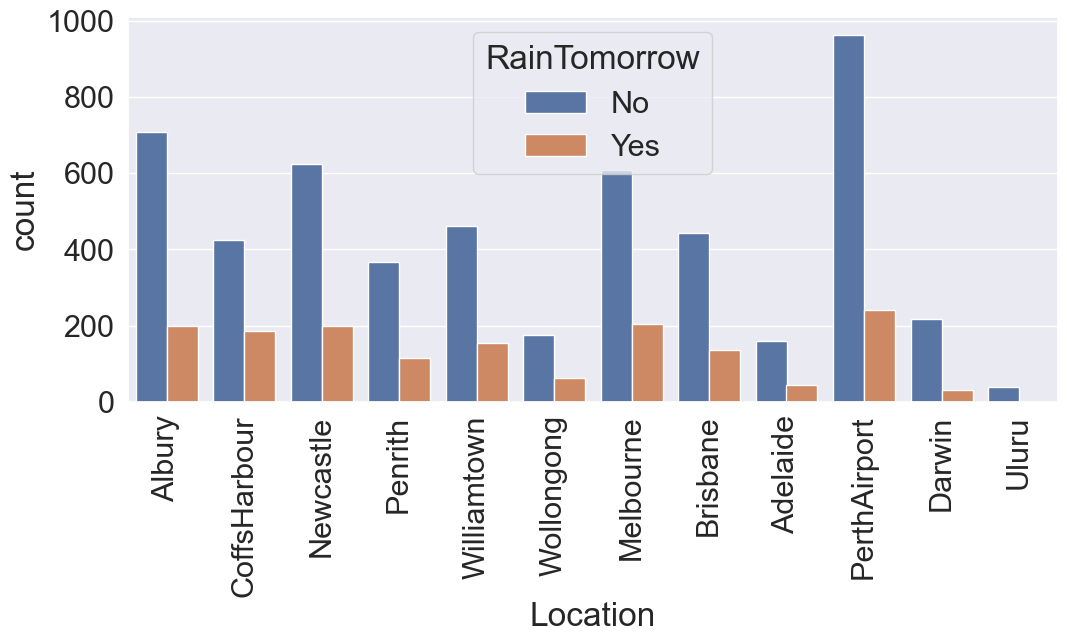

In [50]:
plt.figure(figsize=(12,5))
sns.countplot("Location",data=df, hue='RainTomorrow')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

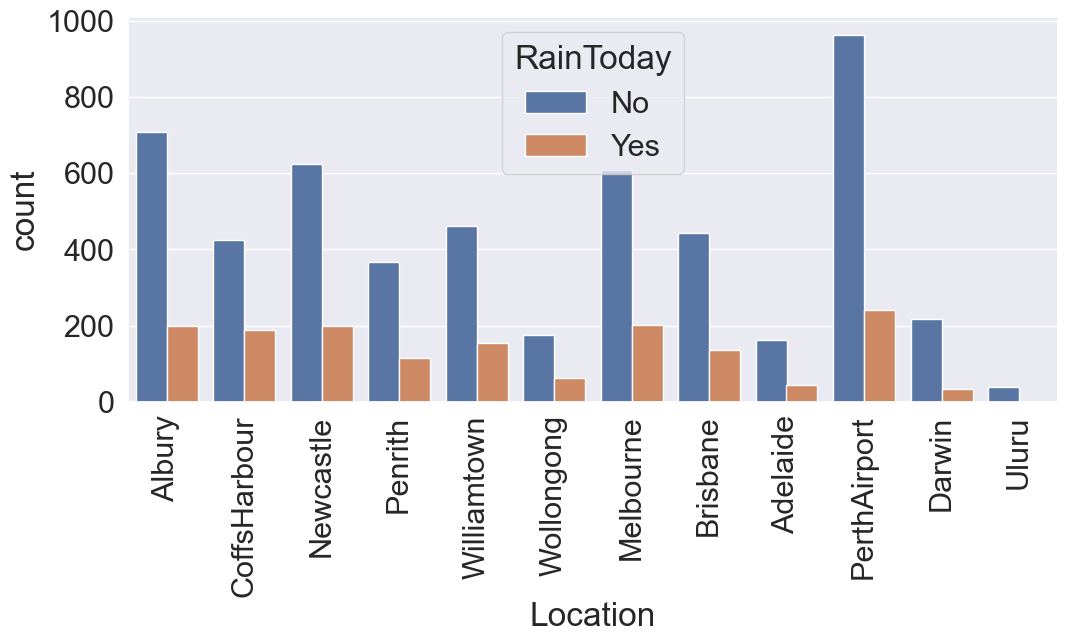

In [51]:
plt.figure(figsize=(12,5))
sns.countplot("Location",data=df, hue='RainToday')
plt.xticks(rotation=90)

### Multivariate Analysis

#### Using Pairplot

In [ ]:
sns.pairplot(df,hue="RainTomorrow")

### Distribution Plots

In [ ]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()    

## Label Encoding

In [54]:
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [56]:
df.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1         44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2         38.0         30.0       1007.6       1008.7  4.566622  2.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8          0             0    1     12  2008  
1     17.2     24.3          0             0    2     12  2008  
2     21.0     23.2          0             0    3     12  2008

all the categorial column has been changed into Numerical column

### Correlation

In [57]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090453  0.070832 -0.003490     0.138154  0.064514   
MinTemp        0.090453  1.000000  0.728063  0.092439     0.267755  0.047933   
MaxTemp        0.070832  0.728063  1.000000 -0.087620     0.345830  0.361249   
Rainfall      -0.003490  0.092439 -0.087620  1.000000    -0.000275 -0.190437   
Evaporation    0.138154  0.267755  0.345830 -0.000275     1.000000  0.262840   
Sunshine       0.064514  0.047933  0.361249 -0.190437     0.262840  1.000000   
WindGustDir   -0.074300 -0.150774 -0.217567  0.036672    -0.096780 -0.106207   
WindGustSpeed  0.262774  0.242375  0.164883  0.090857     0.162834  0.013039   
WindDir9am    -0.088884 -0.020875 -0.192523  0.091665    -0.083373 -0.079388   
WindDir3pm    -0.001275 -0.139535 -0.160997  0.032055    -0.036496 -0.055797   
WindSpeed9am   0.240984  0.169559  0.056748  0.051985     0.129189  0.024077   
WindSpeed3pm   0.230088  0.187798  0.115482  0.022619     0.110119  0.059477   
Humidity9am   -0.033612 -0.154224 -0.425012  0.228657    -0.242224 -0.388966   
Humidity3pm   -0.001340  0.067502 -0.430741  0.243354    -0.189347 -0.446497   
Pressure9am   -0.037507 -0.441325 -0.337877 -0.073020    -0.201735 -0.003533   
Pressure3pm   -0.023255 -0.440888 -0.413459 -0.034082    -0.216361 -0.059875   
Cloud9am      -0.011615  0.087812 -0.246427  0.193093    -0.072151 -0.551186   
Cloud3pm      -0.013584  0.040742 -0.243364  0.160200    -0.119730 -0.568954   
Temp9am        0.098478  0.891401  0.866615 -0.004171     0.314590  0.246864   
Temp3pm        0.066192  0.696614  0.974843 -0.091945     0.338812  0.379144   
RainToday     -0.004280  0.075905 -0.225662  0.459135    -0.112325 -0.256126   
RainTomorrow  -0.004506  0.097171 -0.160218  0.224217    -0.076600 -0.345379   
day           -0.000710  0.014355  0.016083 -0.008664     0.009713  0.001801   
month         -0.067376 -0.237202 -0.171805 -0.012874    -0.008864 -0.004769   
year           0.503047  0.032967  0.081412 -0.006977     0.142162  0.049631   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location         -0.074300       0.262774   -0.088884   -0.001275   
MinTemp          -0.150774       0.242375   -0.020875   -0.139535   
MaxTemp          -0.217567       0.164883   -0.192523   -0.160997   
Rainfall          0.036672       0.090857    0.091665    0.032055   
Evaporation      -0.096780       0.162834   -0.083373   -0.036496   
Sunshine         -0.106207       0.013039   -0.079388   -0.055797   
WindGustDir       1.000000       0.000480    0.385221    0.502140   
WindGustSpeed     0.000480       1.000000   -0.075987    0.078794   
WindDir9am        0.385221      -0.075987    1.000000    0.216648   
WindDir3pm        0.502140       0.078794    0.216648    1.000000   
WindSpeed9am      0.015291       0.584105    0.056413    0.010819   
WindSpeed3pm      0.106009       0.615217    0.044693    0.085263   
Humidity9am       0.040937      -0.265362    0.015462   -0.005558   
Humidity3pm       0.048025      -0.092423    0.126407   -0.009464   
Pressure9am      -0.110879      -0.394086   -0.027671   -0.139020   
Pressure3pm      -0.029383      -0.363669    0.050710   -0.049299   
Cloud9am          0.121621       0.007703    0.079419    0.072567   
Cloud3pm          0.088311       0.053480    0.058235    0.052121   
Temp9am          -0.171100       0.221060   -0.070937   -0.146479   
Temp3pm          -0.231060       0.129193   -0.200949   -0.175048   
RainToday         0.123042       0.085796    0.157884    0.094507   
RainTomorrow      0.048487       0.184221    0.040399    0.004301   
day               0.011975      -0.003636   -0.014730    0.001723   
month             0.041334       0.050615    0.019799    0.034494   
year             -0.122957      -0.018529   -0.062314    0.010694   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location           0.240984      0.230088    -0.033612    -0.001340 

This gives the correlation between the dependent and independent variables.

In [59]:
df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.345379
Temp3pm         -0.202900
MaxTemp         -0.160218
Pressure9am     -0.159095
Pressure3pm     -0.131685
Evaporation     -0.076600
Temp9am         -0.025813
year            -0.014769
day             -0.007560
Location        -0.004506
month           -0.003575
WindDir3pm       0.004301
WindDir9am       0.040399
WindSpeed3pm     0.043186
WindGustDir      0.048487
WindSpeed9am     0.058026
MinTemp          0.097171
WindGustSpeed    0.184221
Rainfall         0.224217
Humidity9am      0.287796
Cloud9am         0.294176
RainToday        0.323691
Cloud3pm         0.356770
Humidity3pm      0.466750
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

##### We can observe :

- All columns are sorted in ascending order showing least to strong correlation with target column.
- 11 columns are negatively correlated and 14 columns are positively correlated.
- Column 'Humidity3pm' is highly correlated with Target column and Column 'Sunshine' is least correlated with Target column

## Visualizing the correlation matrix by plotting heat map.

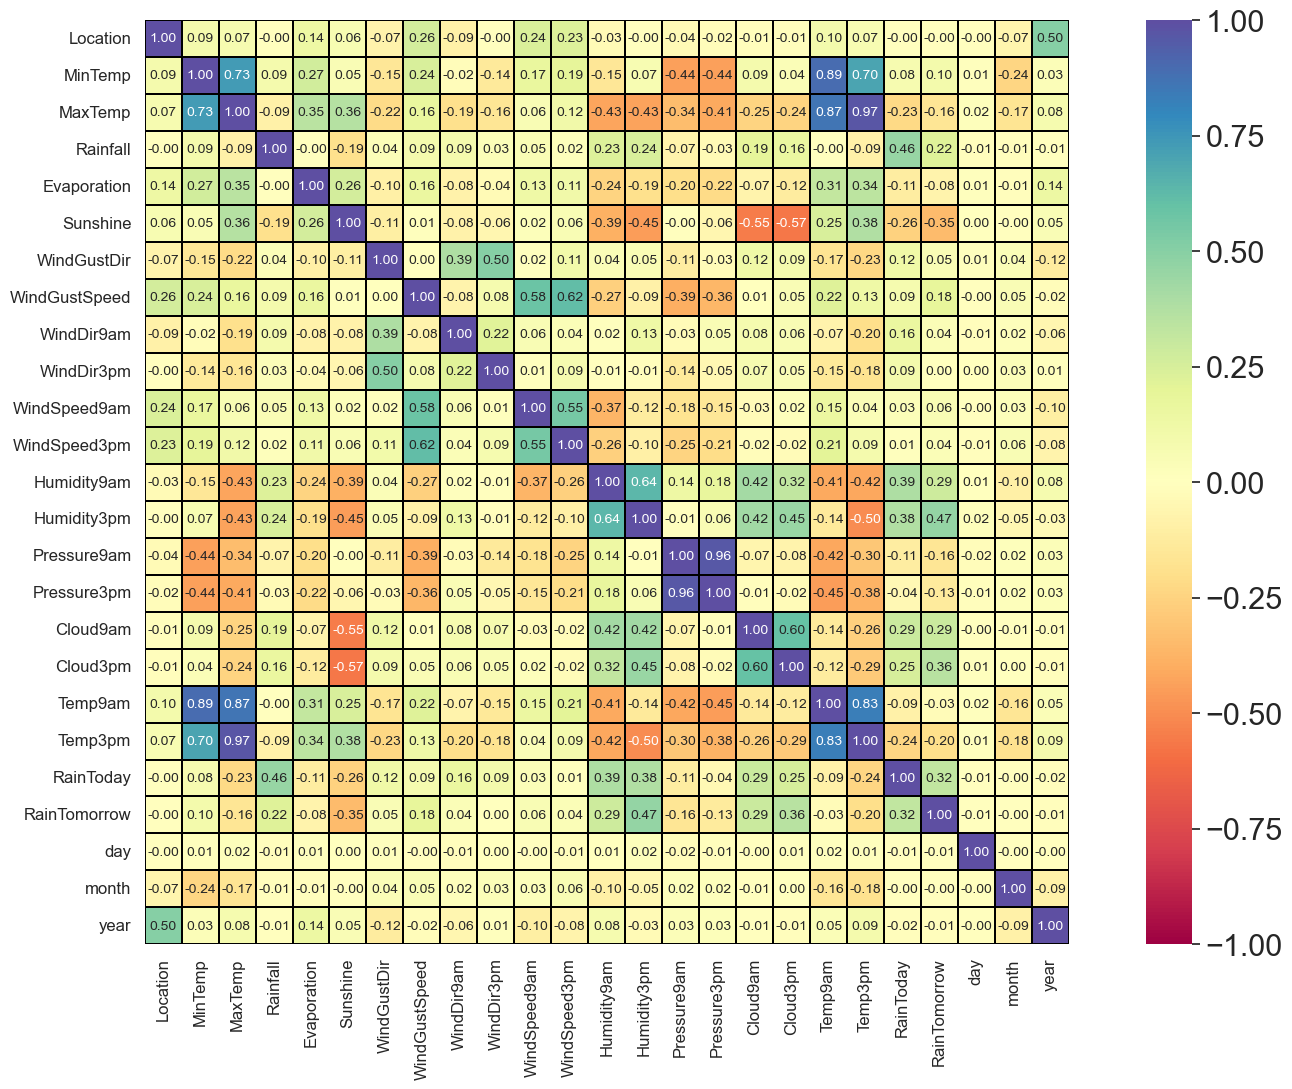

In [60]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10}, cmap="Spectral")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Outcome of Correlation
 - HUmidity3pm has 47 percent correlation with the target column which can be considered as Highly correlation and positively correlated. 
 - Temp3pm has 20 percent correlation with the target column which can be considered as highly correlation and Negatively correlated.

 - Max correlation is with Humidity3pm 
 - Min correlation is with Temp3pm

#### Checking correlation with barplot

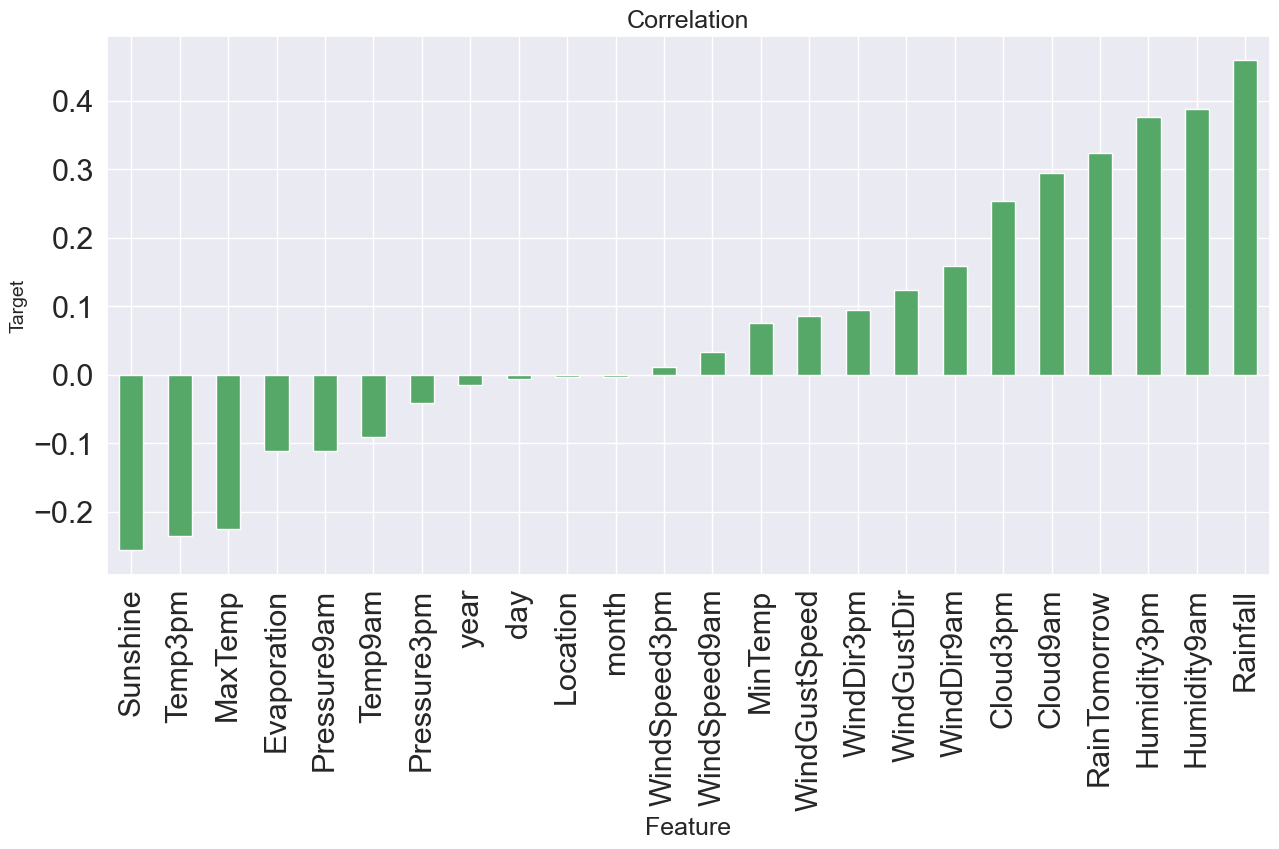

In [61]:
plt.figure(figsize=(15,7))
df.corr()['RainToday'].sort_values(ascending=True).drop(['RainToday']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

##### Outcome:
- Here we can see Sunshine is least correletaed with Target Column and Relationship is highly but negatively correletaed with Target Column. 
- And, Highly correlated is RainFall with target column.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   int32  
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   int32  
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   int32  
 9   WindDir3pm     6762 non-null   int32  
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

## Checking Outliers

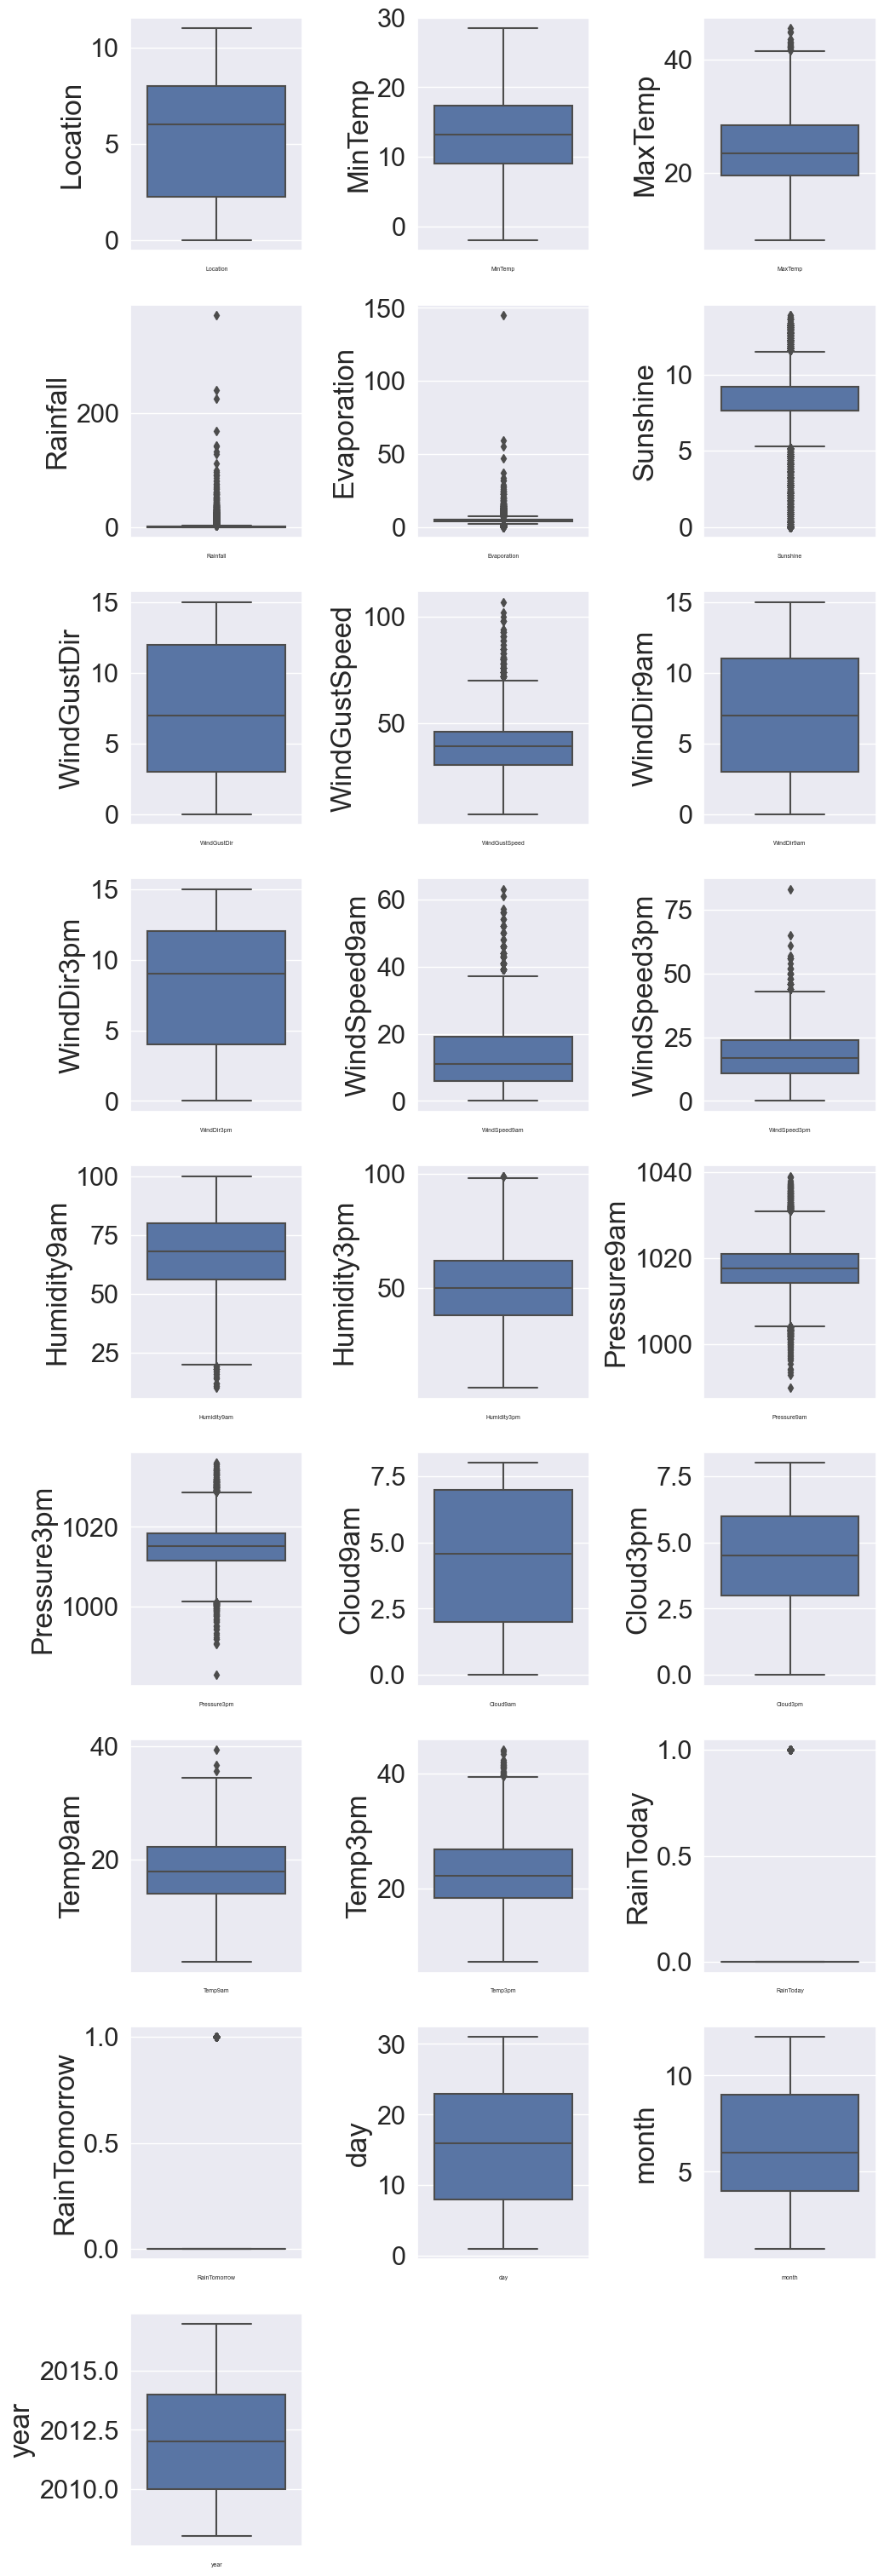

In [63]:
plt.figure(figsize=(10,30), facecolor='white')
plotnumber = 1
for column in df.columns: #column in features:
    if plotnumber<=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(y=column, data=df)
        plt.xlabel(column,fontsize=5)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above plotting we can see that there is many columns have outliers

So,We need to treat outliers

### Removing Outliers using Zscore

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df))
thershold=3
df_new=df[(z<3).all(axis=1)]
df_new.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1         44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2         38.0         30.0       1007.6       1008.7  4.566622  2.000000   
3         45.0         16.0       1017.6       1012.8  4.566622  4.503183   
4         82.0         33.0       1010.8       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8          0             0    1     12  2008  
1     17.2     24.3          0             0    2     12  2008  
2     21.0     23.2          0             0    3     12  2008  
3     18.1     26.5          0             0    4     12  2008  
4     17.8     29.7          0             0    5     12  2008

In [65]:
z.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  1.395097  0.052341  0.195170  0.208040     0.014779  0.049294     1.246744   
1  1.395097  1.030640  0.163738  0.265281     0.014779  0.049294     1.455523   
2  1.395097  0.037907  0.261622  0.265281     0.014779  0.049294     1.664301   
3  1.395097  0.705746  0.636844  0.265281     0.014779  0.049294     0.632264   
4  1.395097  0.792378  1.338345  0.169879     0.014779  0.049294     1.246744   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.362850    1.315650    1.372365      0.736444      0.671784   
1       0.362850    0.222688    1.595253      0.898312      0.462330   
2       0.512305    1.315650    1.595253      0.634272      0.881238   
3       1.131708    0.436600    1.748064      0.183106      0.899122   
4       0.138666    1.321500    0.187849      0.591796      0.252876   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0     0.203179     1.539598     1.647292     1.347736  1.453517  0.056332   
1     1.368283     1.377411     1.166162     1.230431  0.067188  0.056332   
2     1.717496     1.107100     1.663883     1.079611  0.067188  1.020514   
3     1.310080     1.863971     0.004812     0.392542  0.067188  0.056332   
4     0.843405     0.944913     1.132980     1.532071  1.049737  1.560632   

    Temp9am   Temp3pm  RainToday  RainTomorrow       day     month      year  
0  0.173722  0.151545   0.550355      0.550355  1.675969  1.639768  1.761148  
1  0.121292  0.267112   0.550355      0.550355  1.562245  1.639768  1.761148  
2  0.542811  0.082903   0.550355      0.550355  1.448521  1.639768  1.761148  
3  0.035995  0.635529   0.550355      0.550355  1.334798  1.639768  1.761148  
4  0.016434  1.171410   0.550355      0.550355  1.221074  1.639768  1.761148

In [66]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_new.shape)
print("Total Dropped rows:",df.shape[0]-df_new.shape[0])
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Old DataFrame data in Rows and Column: (6762, 25)
New DataFrame data in Rows and Column: (6409, 25)
Total Dropped rows: 353
Percentage of data loss post outlier removal:  5.220349009168885


### Percentage Data Loss using Zscore is 5.22  so acceptable

## Checking for the skewness

In [67]:
df_new.skew().sort_values()

Sunshine        -0.747742
Cloud9am        -0.279140
Humidity9am     -0.233515
Cloud3pm        -0.212402
WindDir3pm      -0.128886
MinTemp         -0.079583
Temp9am         -0.071954
Location         0.004558
day              0.004771
month            0.032770
Pressure9am      0.062576
Pressure3pm      0.077866
Humidity3pm      0.156591
WindGustDir      0.178714
WindDir9am       0.210848
MaxTemp          0.266849
Temp3pm          0.292131
WindSpeed3pm     0.336515
year             0.352924
WindGustSpeed    0.434313
Evaporation      0.666495
WindSpeed9am     0.673887
RainTomorrow     1.330358
RainToday        1.331440
Rainfall         3.514866
dtype: float64

In [68]:
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [69]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'day',
 'month',
 'year']

### Observation:
- Skewness threshold taken is +/-0.50
- Columns which are having skewness:Evaporation,WindSpeed9am,RainTomorrow,RainToday,Rainfall

- The Sunshine column data is negatively highly skewed and RainFall is positively highly skewed.

- All the columns are not normally distributed, they are skewed.
- Since RainToday,RainTomorrow are  categorical column so we will not remove skewness from them and also Target Column so we will not remove skewness. 
- Only we will remove skewness from remaining column contains continuous data.

### Checking skweness through Data Visualization

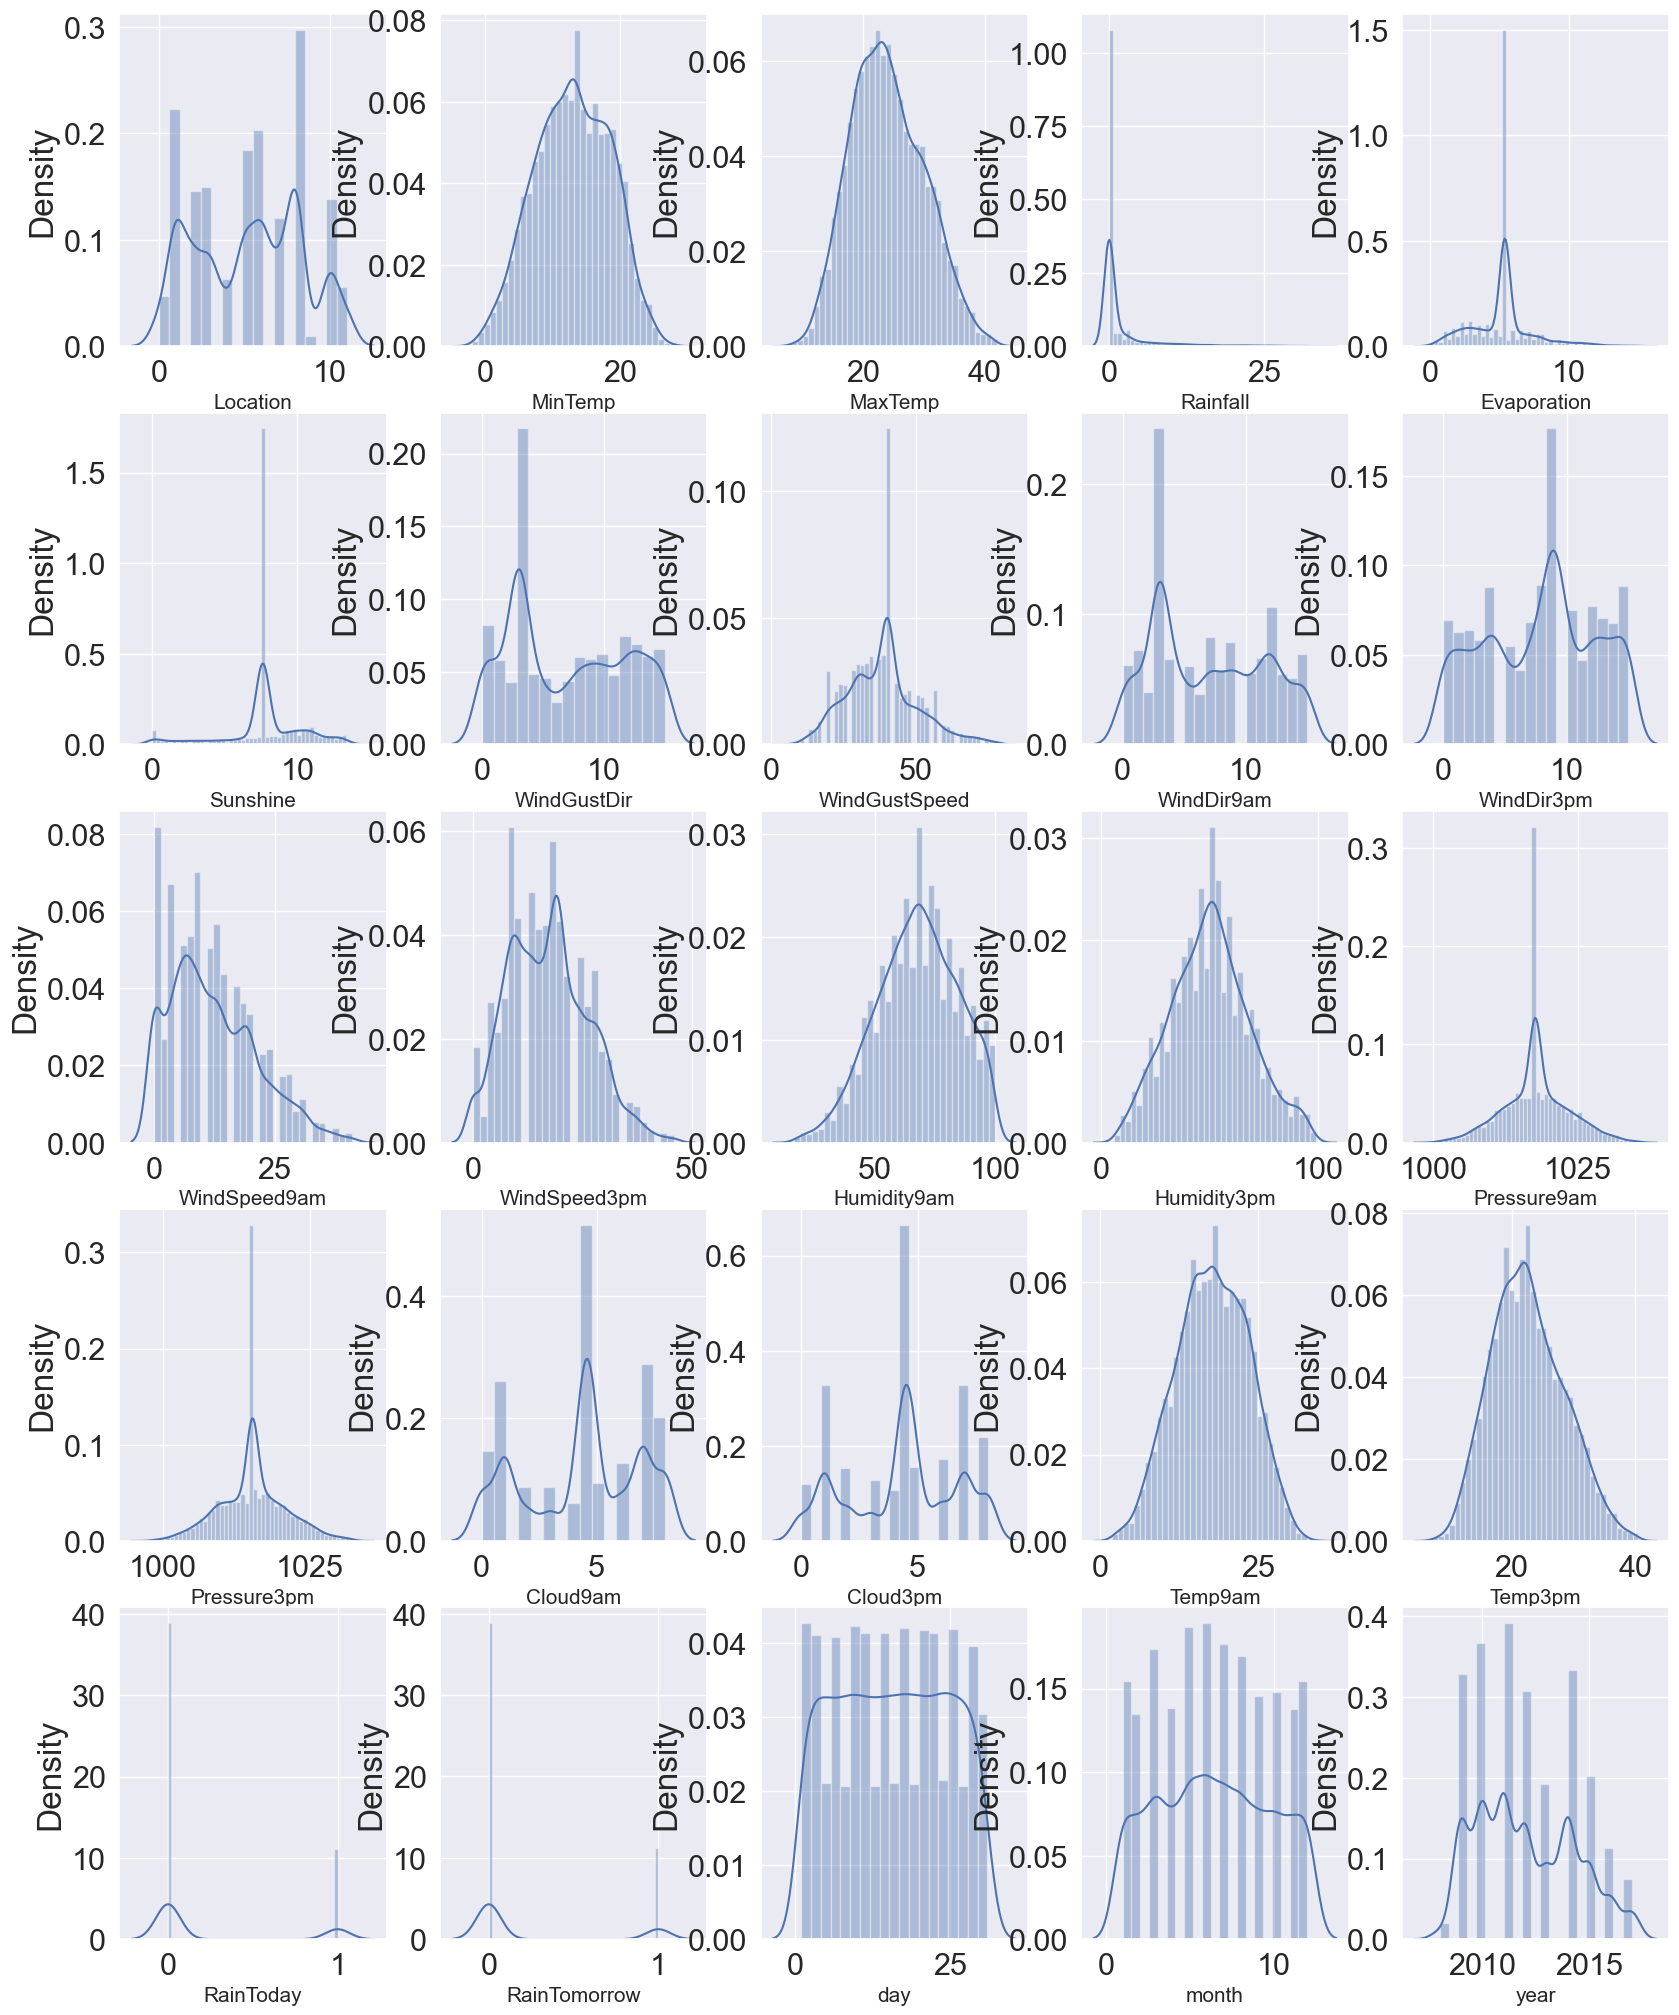

In [70]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

### Data visualization of skewed continuous column using distplot

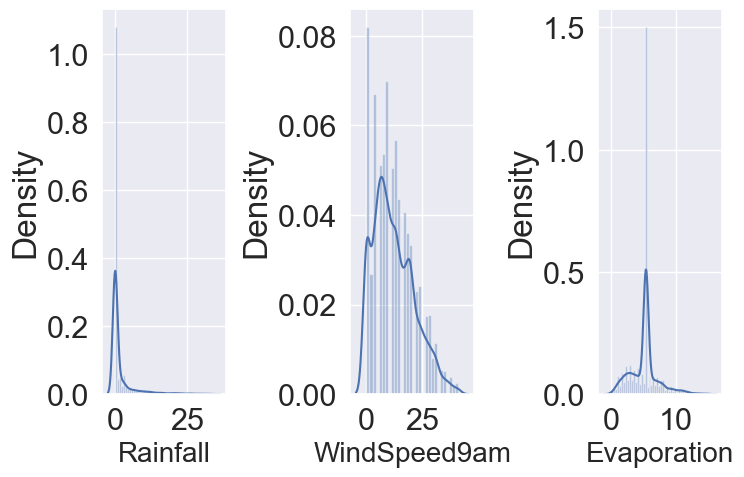

In [71]:
collist=['Rainfall',"WindSpeed9am","Evaporation"]
plt.figure(figsize=(8,5), facecolor='white')
plotnumber = 1

for column in df_new[collist]:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.subplots_adjust(wspace=1)
plt.show()

### Removing skewness

In [72]:
from sklearn.preprocessing import PowerTransformer

In [73]:
collist=['Rainfall',"WindSpeed9am","Evaporation"]
pt = PowerTransformer(method='yeo-johnson')
df_new[collist] = pt.fit_transform(df_new[collist])
df_new[collist]

Rainfall  WindSpeed9am  Evaporation
0     0.685440      0.904165     0.171997
1    -0.674930     -0.859874     0.171997
2    -0.674930      0.821577     0.171997
3    -0.674930      0.065993     0.171997
4     1.045239     -0.412396     0.171997
...        ...           ...          ...
8420 -0.674930      0.274378     0.171997
8421 -0.674930      0.274378     0.171997
8422 -0.674930     -0.160941     0.171997
8423 -0.674930      0.274378     0.171997
8424 -0.674930      0.649843     0.171997

[6409 rows x 3 columns]

In [74]:
df_new['Rainfall'] = np.cbrt(df_new['Rainfall'])
df_new["WindSpeed9am"] = np.cbrt(df_new["WindSpeed9am"])
df_new["Evaporation"] = np.cbrt(df_new["Evaporation"])

### checking skewness after removal

In [75]:
df_new.skew().sort_values()

Sunshine        -0.747742
Evaporation     -0.616941
Cloud9am        -0.279140
Humidity9am     -0.233515
Cloud3pm        -0.212402
WindDir3pm      -0.128886
MinTemp         -0.079583
Temp9am         -0.071954
WindSpeed9am    -0.071552
Location         0.004558
day              0.004771
month            0.032770
Pressure9am      0.062576
Pressure3pm      0.077866
Humidity3pm      0.156591
WindGustDir      0.178714
WindDir9am       0.210848
MaxTemp          0.266849
Temp3pm          0.292131
WindSpeed3pm     0.336515
year             0.352924
WindGustSpeed    0.434313
Rainfall         0.845732
RainTomorrow     1.330358
RainToday        1.331440
dtype: float64

### checking skewness after removal through data visualization using distplot

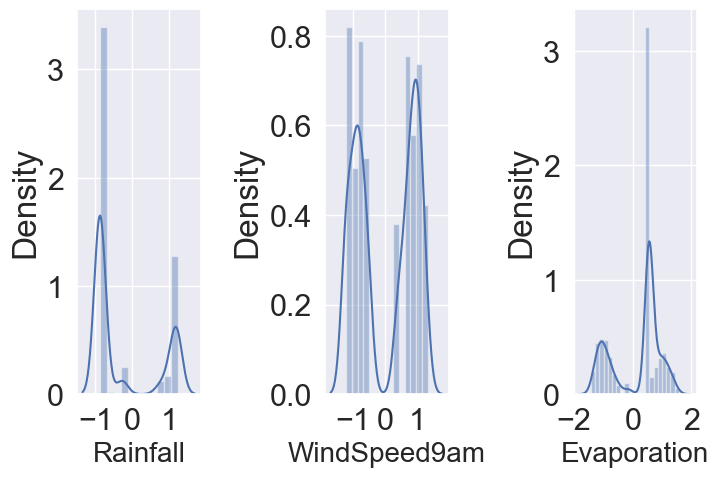

In [76]:
collist=['Rainfall',"WindSpeed9am","Evaporation"]
plt.figure(figsize=(8,5), facecolor='white')
plotnumber = 1

for column in df_new[collist]:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.subplots_adjust(wspace=1)
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

## Data preprocessing

### Separating the features and label variables into x and y

In [124]:
x=df_new.drop("RainTomorrow",axis=1)
y=df_new["RainTomorrow"]

In [125]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'day', 'month', 'year'],
      dtype='object')

In [126]:
x.shape,y.shape

((6409, 24), (6409,))

In [127]:
y.value_counts()

0    4979
1    1430
Name: RainTomorrow, dtype: int64

The data is not balanced. So, we will use oversampling method to balance it.

## Oversampling using the SMOTE

In [128]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [129]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [130]:
y.value_counts()

0    4979
1    4979
Name: RainTomorrow, dtype: int64

After using oversampling method, we check that now our data is balanced.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

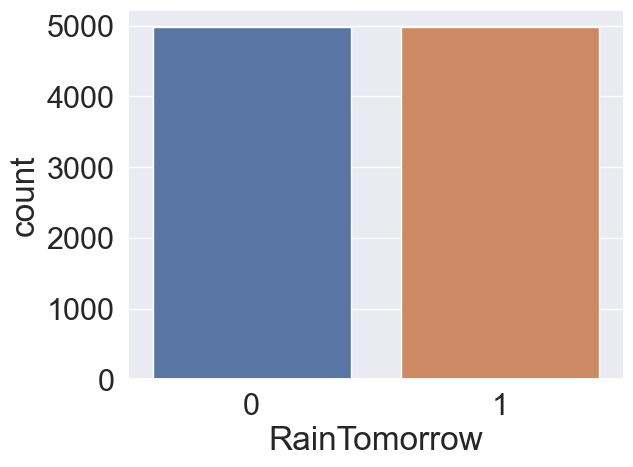

In [131]:
#checking through visualization also
sns.countplot(y)

Now, our data is balanced.

## Scaling data using Standard Scaler

In [132]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [133]:
x.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0 -1.426335  0.003515 -0.091074  1.020702     0.563264  0.153157     1.327750   
1 -1.426335 -1.107764  0.281646 -0.877921     0.563264  0.153157     1.547804   
2 -1.426335 -0.089091  0.383297 -0.877921     0.563264  0.153157     1.767858   
3 -1.426335 -0.774380  0.772959 -0.877921     0.563264  0.153157    -0.652737   
4 -1.426335  0.762890  1.501458  1.164434     0.563264  0.153157     1.327750   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.358966    1.375225    1.460050      1.047890      0.730583   
1       0.358966   -0.219223    1.692087     -1.126214      0.512921   
2       0.517712    1.375225    1.692087      1.013444      0.948245   
3      -1.228497    0.464112   -1.788462      0.409832     -0.901882   
4       0.120846   -1.358115   -0.164206     -0.892036      0.295259   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0     0.012681    -1.766999    -1.704801    -1.396002  1.354020 -0.154836   
1    -1.616644    -1.610242    -1.186120    -1.269821 -0.097504 -0.154836   
2    -1.978716    -1.348981    -1.722687    -1.107589 -0.097504 -1.275582   
3    -1.556299    -2.080512     0.065868    -0.368531 -0.097504 -0.154836   
4     0.676480    -1.192225    -1.150349    -1.594286  0.931251  1.410789   

    Temp9am   Temp3pm  RainToday       day     month      year  
0 -0.154376 -0.026599  -0.563665 -1.660515  1.800345 -1.775447  
1 -0.100136  0.405217  -0.563665 -1.545810  1.800345 -1.775447  
2  0.586908  0.215218  -0.563665 -1.431105  1.800345 -1.775447  
3  0.062585  0.785215  -0.563665 -1.316400  1.800345 -1.775447  
4  0.008345  1.337939  -0.563665 -1.201695  1.800345 -1.775447

## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

## SelectKBest method

In [134]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [135]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [136]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(25,'Score'))

          Feature        Score
13    Humidity3pm  3685.227679
17       Cloud3pm  2204.581590
5        Sunshine  1827.735476
3        Rainfall  1576.927680
12    Humidity9am  1359.224138
16       Cloud9am  1325.135224
19        Temp3pm   576.849472
20      RainToday   417.960497
2         MaxTemp   372.904440
7   WindGustSpeed   343.523006
14    Pressure9am   305.137926
15    Pressure3pm   193.117199
4     Evaporation   167.174724
1         MinTemp   141.969760
23           year    39.726607
22          month    33.227555
10   WindSpeed9am    25.948072
9      WindDir3pm    10.652055
11   WindSpeed3pm     7.643977
18        Temp9am     7.440084
21            day     7.005214
0        Location     6.759260
6     WindGustDir     0.915839
8      WindDir9am     0.638160


In [137]:
x = x.drop([ "WindGustDir"],axis=1)
x = x.drop([ "WindDir9am"],axis=1)
x = x.drop([ "Location"],axis=1)

dropped low score Features

In [138]:
x.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'day', 'month', 'year'],
      dtype='object')

Now, we have completed features selection process through above techniques. So, will check for multicolinearity now.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif.sort_values(by='VIF values', inplace=True)
vif

VIF values       Features
18    1.006931            day
20    1.140228           year
19    1.172190          month
6     1.241869     WindDir3pm
3     1.535218    Evaporation
7     1.852327   WindSpeed9am
5     1.971214  WindGustSpeed
8     1.985926   WindSpeed3pm
14    2.031453       Cloud3pm
13    2.092409       Cloud9am
4     2.118741       Sunshine
17    2.393631      RainToday
2     2.997363       Rainfall
9     4.312622    Humidity9am
10    6.394880    Humidity3pm
0    10.323089        MinTemp
12   18.416610    Pressure3pm
11   19.427891    Pressure9am
15   20.500789        Temp9am
1    26.355376        MaxTemp
16   34.502507        Temp3pm

After many hit and trial methods we came to know that we have to drop three columns so that every VIF value comes under the acceptance range. Those three columns are MaxTemp,Temp3pm and Temp9am.

In [141]:
x.drop(['Pressure9am','Temp9am','Temp3pm',"MaxTemp","Pressure3pm",],axis=1,inplace=True)

### Removing VIF

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif.sort_values(by='vif', inplace=True)
vif

Features       vif
13            day  1.003679
5      WindDir3pm  1.090507
15           year  1.114263
14          month  1.141081
0         MinTemp  1.406332
2     Evaporation  1.464239
6    WindSpeed9am  1.762046
4   WindGustSpeed  1.808128
7    WindSpeed3pm  1.910575
11       Cloud3pm  2.015731
10       Cloud9am  2.018890
3        Sunshine  2.062367
9     Humidity3pm  2.276528
12      RainToday  2.390563
8     Humidity9am  2.598344
1        Rainfall  2.897436

__No Multi-collinearaity is present in columns. So, we will create model now.__

# Creating Model

#### Finding the best random state among all the models

In [143]:
models=[RandomForestClassifier(),DecisionTreeClassifier()]

In [144]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.9009370816599732 on Random State: 41


In [145]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [146]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=41)

In [147]:
x.shape, y.shape

((9958, 16), (9958,))

In [148]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((6970, 16), (6970,), (2988, 16), (2988,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## Models with their metrics

In [149]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*100)

 For GaussianNB()  Accuracy score is:  0.7392904953145917

 Confusion matrix: 
 [[1140  370]
 [ 409 1069]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      1510
           1       0.74      0.72      0.73      1478

    accuracy                           0.74      2988
   macro avg       0.74      0.74      0.74      2988
weighted avg       0.74      0.74      0.74      2988

Cross Validation Score= 0.7185221549180145 

****************************************************************************************************
 For LogisticRegression()  Accuracy score is:  0.7931726907630522

 Confusion matrix: 
 [[1214  296]
 [ 322 1156]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1510
           1       0.80      0.78      0.79      1478

    accuracy                           0.79      2988
   macro avg       0.79      0.79

### so, RandomForestClassifier()  getting best score in Accuracy: 89.15%

### Confusion Matrix for RFC

Text(0.5, 1.0, 'RFC prediction Confusion_matrix')

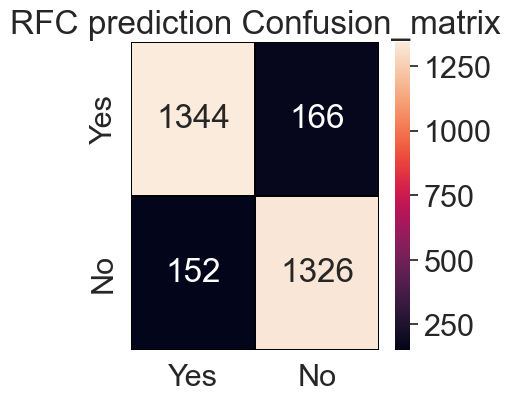

In [150]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

cm = confusion_matrix(y_test,pred_rfc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("RFC prediction Confusion_matrix")

## Hyper parameter tuning for best model using GridsearchCV

In [151]:
from sklearn.metrics import make_scorer, precision_score, recall_score

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 41)
rfc=RandomForestClassifier(random_state=30)
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,20,50),
      'criterion':['gini','entropy']}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto'}

In [153]:
final_model=RandomForestClassifier(random_state=45, max_features='auto', max_depth=50, criterion="gini")
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.59170013386881


### after hyper parameter tuning , accuracy will reach to 89.59%

## ROC-AUC Curve

In [154]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error

In [155]:
fpr, tpr, threshold = roc_curve(y_test,fmod_pred)
auc = roc_auc_score(y_test,fmod_pred)

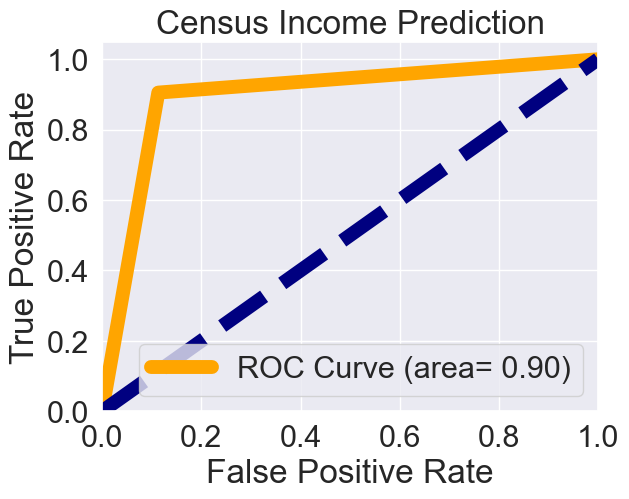

In [156]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Census Income Prediction")
plt.legend(loc="lower right")
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.90

In general, an ROC-AUC of 0.5 suggests no discrimination , 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding. now our curve is in excellent

In [157]:
x.head(3)

MinTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindDir3pm  \
0  0.003515  1.020702     0.563264  0.153157       0.358966    1.460050   
1 -1.107764 -0.877921     0.563264  0.153157       0.358966    1.692087   
2 -0.089091 -0.877921     0.563264  0.153157       0.517712    1.692087   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  \
0      1.047890      0.730583     0.012681    -1.766999  1.354020 -0.154836   
1     -1.126214      0.512921    -1.616644    -1.610242 -0.097504 -0.154836   
2      1.013444      0.948245    -1.978716    -1.348981 -0.097504 -1.275582   

   RainToday       day     month      year  
0  -0.563665 -1.660515  1.800345 -1.775447  
1  -0.563665 -1.545810  1.800345 -1.775447  
2  -0.563665 -1.431105  1.800345 -1.775447

In [158]:
pd.set_option('display.max_columns', None)
df.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1         44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2         38.0         30.0       1007.6       1008.7  4.566622  2.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8          0             0    1     12  2008  
1     17.2     24.3          0             0    2     12  2008  
2     21.0     23.2          0             0    3     12  2008

In [159]:
df.tail(3)

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
8422         9      5.4  26.900000       0.0     5.389395  7.632205   
8423         9      7.8  27.000000       0.0     5.389395  7.632205   
8424         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
8422            3      37.000000           9          14           9.0   
8423            9      28.000000          10           3          13.0   
8424            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  day  \
8422  4.566622  4.503183     12.5     26.1          0             0   23   
8423  3.000000  2.000000     15.1     26.0          0             0   24   
8424  8.000000  8.000000     15.0     20.9          0             0   25   

      month  year  
8422      6  2017  
8423      6  2017  
8424      6  2017

### BULDING THE PREDICTION SYSTEM

In [160]:
input_data = (14.9,0,5.38,7.63,40.17,2,17,17,62,36,8,8,0,25,6,2017)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print("Predicted Census_Income:",str(prediction))

Predicted Census_Income: [0]


### getting right prediction. so let's save the model

# Saving the trained model

In [161]:
# Saving the model using .pkl
import pickle
joblib.dump(final_model,"Rainfall Weather Forecasting.pkl")

['Rainfall Weather Forecasting.pkl']

In [162]:
hs= joblib.load(open('Rainfall Weather Forecasting.pkl', 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

89.59170013386881


In [163]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(10)

original  predicted
0         1          1
1         0          0
2         0          0
3         1          1
4         0          0
5         1          1
6         0          0
7         0          0
8         1          1
9         0          0

#### the above results shows that 89.59% results were predicted accurately as per the model.

In [164]:
model =df_com.to_csv('Rainfall Weather Forecasting.csv')
model

__Model Prediction saved in CSV format__

# 2.Predicting Rainfall - Regression model

In [165]:
df

Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0            1     13.4  22.900000       0.6     5.389395  7.632205   
1            1      7.4  25.100000       0.0     5.389395  7.632205   
2            1     12.9  25.700000       0.0     5.389395  7.632205   
3            1      9.2  28.000000       0.0     5.389395  7.632205   
4            1     17.5  32.300000       1.0     5.389395  7.632205   
...        ...      ...        ...       ...          ...       ...   
8420         9      2.8  23.400000       0.0     5.389395  7.632205   
8421         9      3.6  25.300000       0.0     5.389395  7.632205   
8422         9      5.4  26.900000       0.0     5.389395  7.632205   
8423         9      7.8  27.000000       0.0     5.389395  7.632205   
8424         9     14.9  23.859976       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
8420            0      31.000000           9           1          13.0   
8421            6      22.000000           9           3          13.0   
8422            3      37.000000           9          14           9.0   
8423            9      28.000000          10           3          13.0   
8424            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
8420          11.0         51.0         24.0       1024.6       1020.3   
8421           9.0         56.0         21.0       1023.5       1019.1   
8422           9.0         53.0         24.0       1021.0       1016.8   
8423           7.0         51.0         24.0       1019.4       1016.5   
8424          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  day  \
0     8.000000  4.503183     16.9     21.8          0             0    1   
1     4.566622  4.503183     17.2     24.3          0             0    2   
2     4.566622  2.000000     21.0     23.2          0             0    3   
3     4.566622  4.503183     18.1     26.5          0             0    4   
4     7.000000  8.000000     17.8     29.7          0             0    5   
...        ...       ...      ...      ...        ...           ...  ...   
8420  4.566622  4.503183     10.1     22.4          0             0   21   
8421  4.566622  4.503183     10.9     24.5          0             0   22   
8422  4.566622  4.503183     12.5     26.1          0             0   23   
8423  3.000000  2.000000     15.1     26.0          0             0   24   
8424  8.000000  8.000000     15.0     20.9          0             0   25   

      month  year  
0        12  2008  
1        12  2008  
2        12  2008  
3        12  2008  
4        12  2008  
...     ...   ...  
8420      6  2017  
8421      6  2017  
8422      6  2017  
8423      6  2017  
8424      6  2017  

[6762 rows x 25 columns]

all tha data preprocessing has been done at previeous prediction. so lets analyse for "Rainfall" and make prediction

In [166]:
# checking the list of value counts in Target column
df['Rainfall'].value_counts()

0.000000      4334
0.200000       321
0.400000       144
2.805913       138
0.600000        87
              ... 
73.800000        1
23.800000        1
61.200000        1
128.000000       1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

- There are contineous values in the target columns.

We can say that whether the rainfall in mm

this is regression type of problem

In [167]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090453  0.070832 -0.003490     0.138154  0.064514   
MinTemp        0.090453  1.000000  0.728063  0.092439     0.267755  0.047933   
MaxTemp        0.070832  0.728063  1.000000 -0.087620     0.345830  0.361249   
Rainfall      -0.003490  0.092439 -0.087620  1.000000    -0.000275 -0.190437   
Evaporation    0.138154  0.267755  0.345830 -0.000275     1.000000  0.262840   
Sunshine       0.064514  0.047933  0.361249 -0.190437     0.262840  1.000000   
WindGustDir   -0.074300 -0.150774 -0.217567  0.036672    -0.096780 -0.106207   
WindGustSpeed  0.262774  0.242375  0.164883  0.090857     0.162834  0.013039   
WindDir9am    -0.088884 -0.020875 -0.192523  0.091665    -0.083373 -0.079388   
WindDir3pm    -0.001275 -0.139535 -0.160997  0.032055    -0.036496 -0.055797   
WindSpeed9am   0.240984  0.169559  0.056748  0.051985     0.129189  0.024077   
WindSpeed3pm   0.230088  0.187798  0.115482  0.022619     0.110119  0.059477   
Humidity9am   -0.033612 -0.154224 -0.425012  0.228657    -0.242224 -0.388966   
Humidity3pm   -0.001340  0.067502 -0.430741  0.243354    -0.189347 -0.446497   
Pressure9am   -0.037507 -0.441325 -0.337877 -0.073020    -0.201735 -0.003533   
Pressure3pm   -0.023255 -0.440888 -0.413459 -0.034082    -0.216361 -0.059875   
Cloud9am      -0.011615  0.087812 -0.246427  0.193093    -0.072151 -0.551186   
Cloud3pm      -0.013584  0.040742 -0.243364  0.160200    -0.119730 -0.568954   
Temp9am        0.098478  0.891401  0.866615 -0.004171     0.314590  0.246864   
Temp3pm        0.066192  0.696614  0.974843 -0.091945     0.338812  0.379144   
RainToday     -0.004280  0.075905 -0.225662  0.459135    -0.112325 -0.256126   
RainTomorrow  -0.004506  0.097171 -0.160218  0.224217    -0.076600 -0.345379   
day           -0.000710  0.014355  0.016083 -0.008664     0.009713  0.001801   
month         -0.067376 -0.237202 -0.171805 -0.012874    -0.008864 -0.004769   
year           0.503047  0.032967  0.081412 -0.006977     0.142162  0.049631   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
Location         -0.074300       0.262774   -0.088884   -0.001275   
MinTemp          -0.150774       0.242375   -0.020875   -0.139535   
MaxTemp          -0.217567       0.164883   -0.192523   -0.160997   
Rainfall          0.036672       0.090857    0.091665    0.032055   
Evaporation      -0.096780       0.162834   -0.083373   -0.036496   
Sunshine         -0.106207       0.013039   -0.079388   -0.055797   
WindGustDir       1.000000       0.000480    0.385221    0.502140   
WindGustSpeed     0.000480       1.000000   -0.075987    0.078794   
WindDir9am        0.385221      -0.075987    1.000000    0.216648   
WindDir3pm        0.502140       0.078794    0.216648    1.000000   
WindSpeed9am      0.015291       0.584105    0.056413    0.010819   
WindSpeed3pm      0.106009       0.615217    0.044693    0.085263   
Humidity9am       0.040937      -0.265362    0.015462   -0.005558   
Humidity3pm       0.048025      -0.092423    0.126407   -0.009464   
Pressure9am      -0.110879      -0.394086   -0.027671   -0.139020   
Pressure3pm      -0.029383      -0.363669    0.050710   -0.049299   
Cloud9am          0.121621       0.007703    0.079419    0.072567   
Cloud3pm          0.088311       0.053480    0.058235    0.052121   
Temp9am          -0.171100       0.221060   -0.070937   -0.146479   
Temp3pm          -0.231060       0.129193   -0.200949   -0.175048   
RainToday         0.123042       0.085796    0.157884    0.094507   
RainTomorrow      0.048487       0.184221    0.040399    0.004301   
day               0.011975      -0.003636   -0.014730    0.001723   
month             0.041334       0.050615    0.019799    0.034494   
year             -0.122957      -0.018529   -0.062314    0.010694   

               WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
Location           0.240984      0.230088    -0.033612    -0.001340 

This gives the correlation between the dependent and independent variables.

In [168]:
df.corr()['Rainfall'].sort_values()

Sunshine        -0.190437
Temp3pm         -0.091945
MaxTemp         -0.087620
Pressure9am     -0.073020
Pressure3pm     -0.034082
month           -0.012874
day             -0.008664
year            -0.006977
Temp9am         -0.004171
Location        -0.003490
Evaporation     -0.000275
WindSpeed3pm     0.022619
WindDir3pm       0.032055
WindGustDir      0.036672
WindSpeed9am     0.051985
WindGustSpeed    0.090857
WindDir9am       0.091665
MinTemp          0.092439
Cloud3pm         0.160200
Cloud9am         0.193093
RainTomorrow     0.224217
Humidity9am      0.228657
Humidity3pm      0.243354
RainToday        0.459135
Rainfall         1.000000
Name: Rainfall, dtype: float64

##### We can observe :

- All columns are sorted in ascending order showing least to strong correlation with target column.
- 11 columns are negatively correlated and 14 columns are positively correlated.
- Column 'RainToday' is highly correlated with Target column and Column 'Sunshine' is least correlated with Target column

## Visualizing the correlation matrix by plotting heat map.

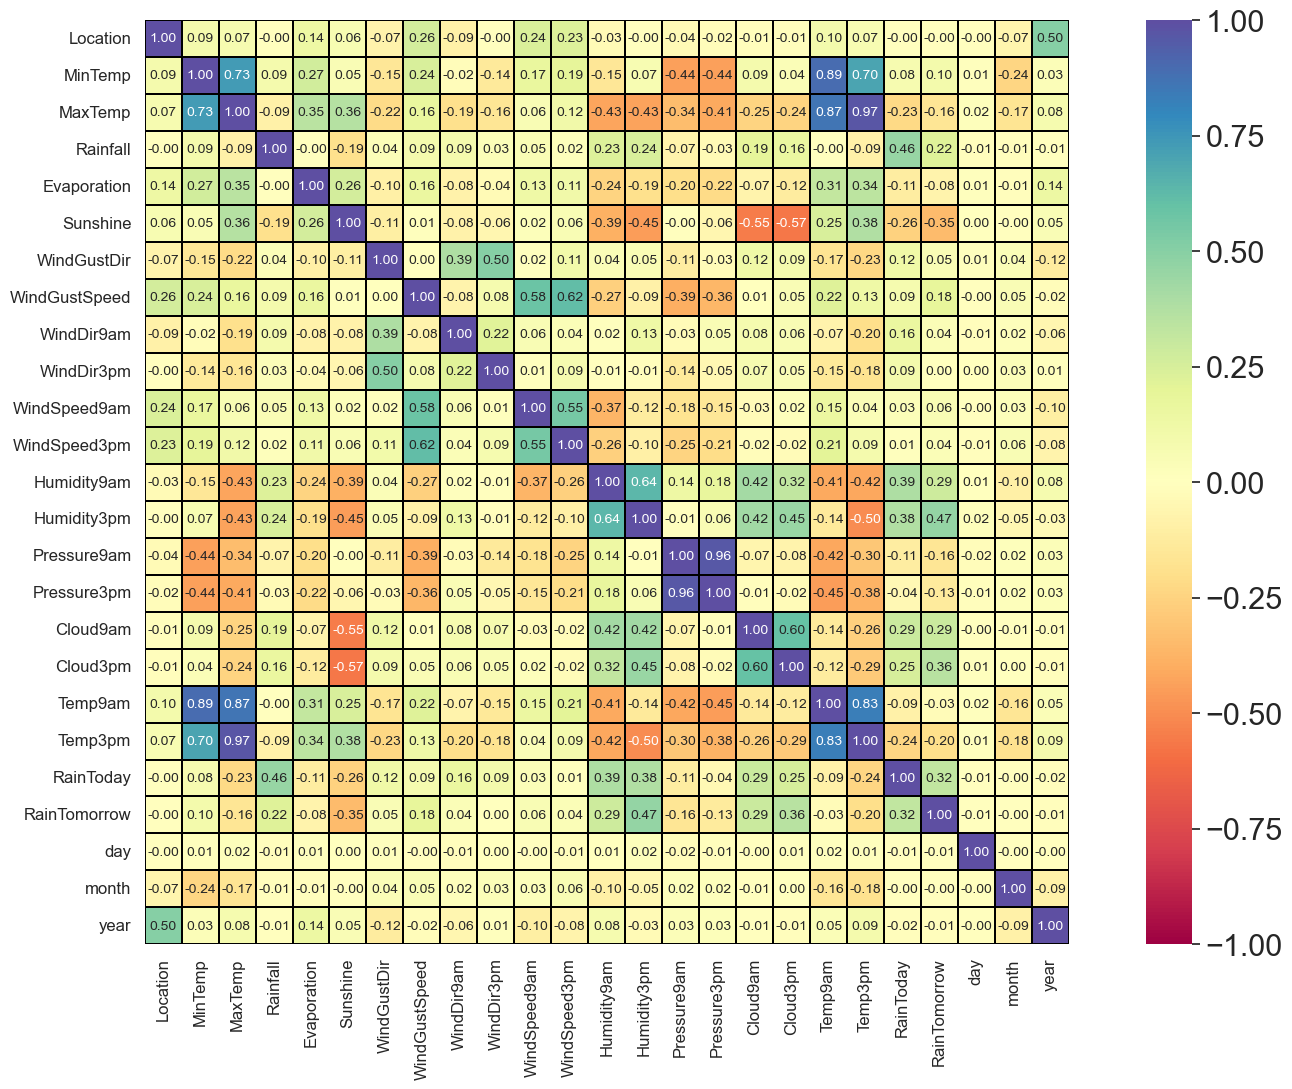

In [169]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10}, cmap="Spectral")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Outcome of Correlation
 - RainToday has 46 percent correlation with the target column which can be considered as Highly correlation and positively correlated. 
 - Sunshine has 19 percent correlation with the target column which can be considered as highly correlation and Negatively correlated.

 - Max correlation is with RainToday
 - Min correlation is with Sunshine

#### Checking correlation with barplot

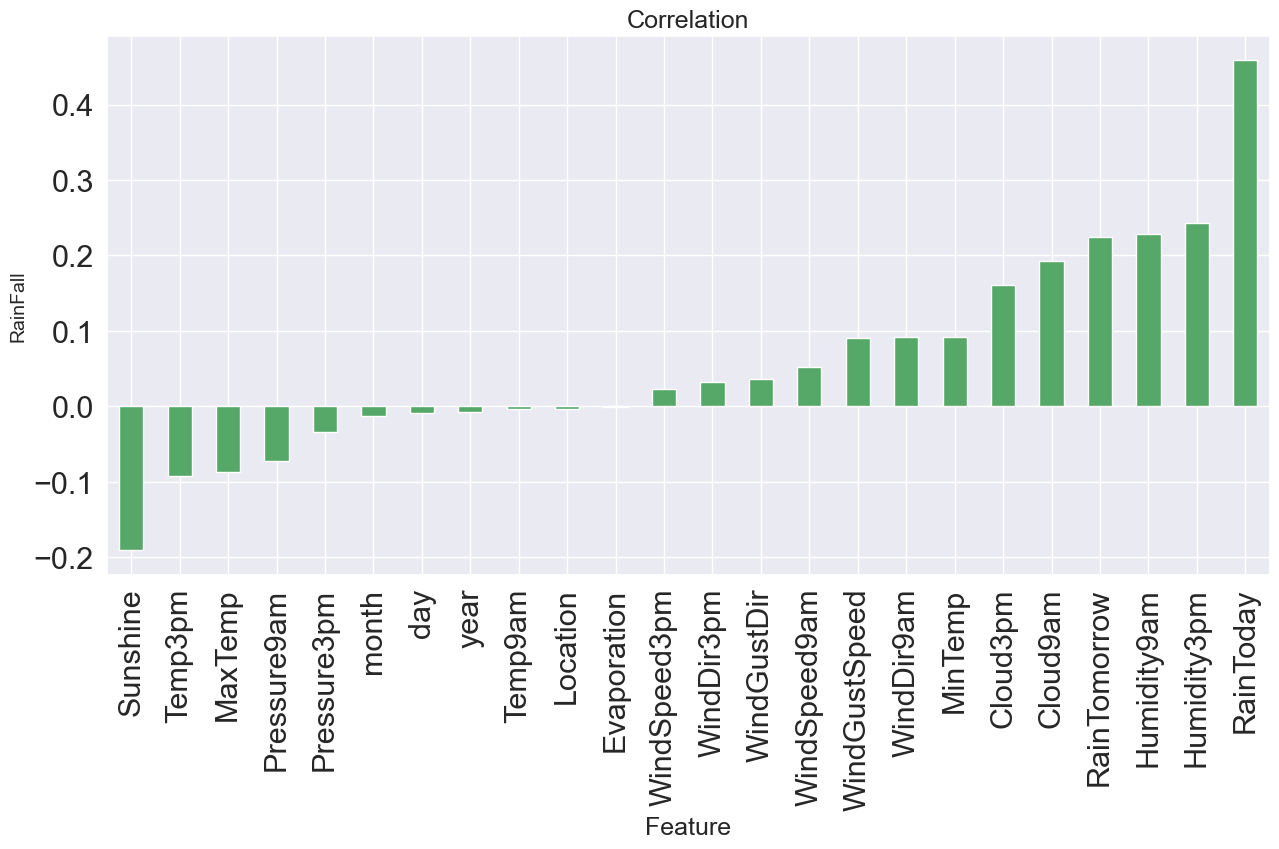

In [170]:
plt.figure(figsize=(15,7))
df.corr()['Rainfall'].sort_values(ascending=True).drop(['Rainfall']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('RainFall',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

##### Outcome:
- Here we can see Sunshine is least correletaed with Target Column and Relationship is highly but negatively correletaed with Target Column. 
- And, Highly correlated is Raintoday with target column.

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6762 non-null   int32  
 1   MinTemp        6762 non-null   float64
 2   MaxTemp        6762 non-null   float64
 3   Rainfall       6762 non-null   float64
 4   Evaporation    6762 non-null   float64
 5   Sunshine       6762 non-null   float64
 6   WindGustDir    6762 non-null   int32  
 7   WindGustSpeed  6762 non-null   float64
 8   WindDir9am     6762 non-null   int32  
 9   WindDir3pm     6762 non-null   int32  
 10  WindSpeed9am   6762 non-null   float64
 11  WindSpeed3pm   6762 non-null   float64
 12  Humidity9am    6762 non-null   float64
 13  Humidity3pm    6762 non-null   float64
 14  Pressure9am    6762 non-null   float64
 15  Pressure3pm    6762 non-null   float64
 16  Cloud9am       6762 non-null   float64
 17  Cloud3pm       6762 non-null   float64
 18  Temp9am 

## Checking Outliers

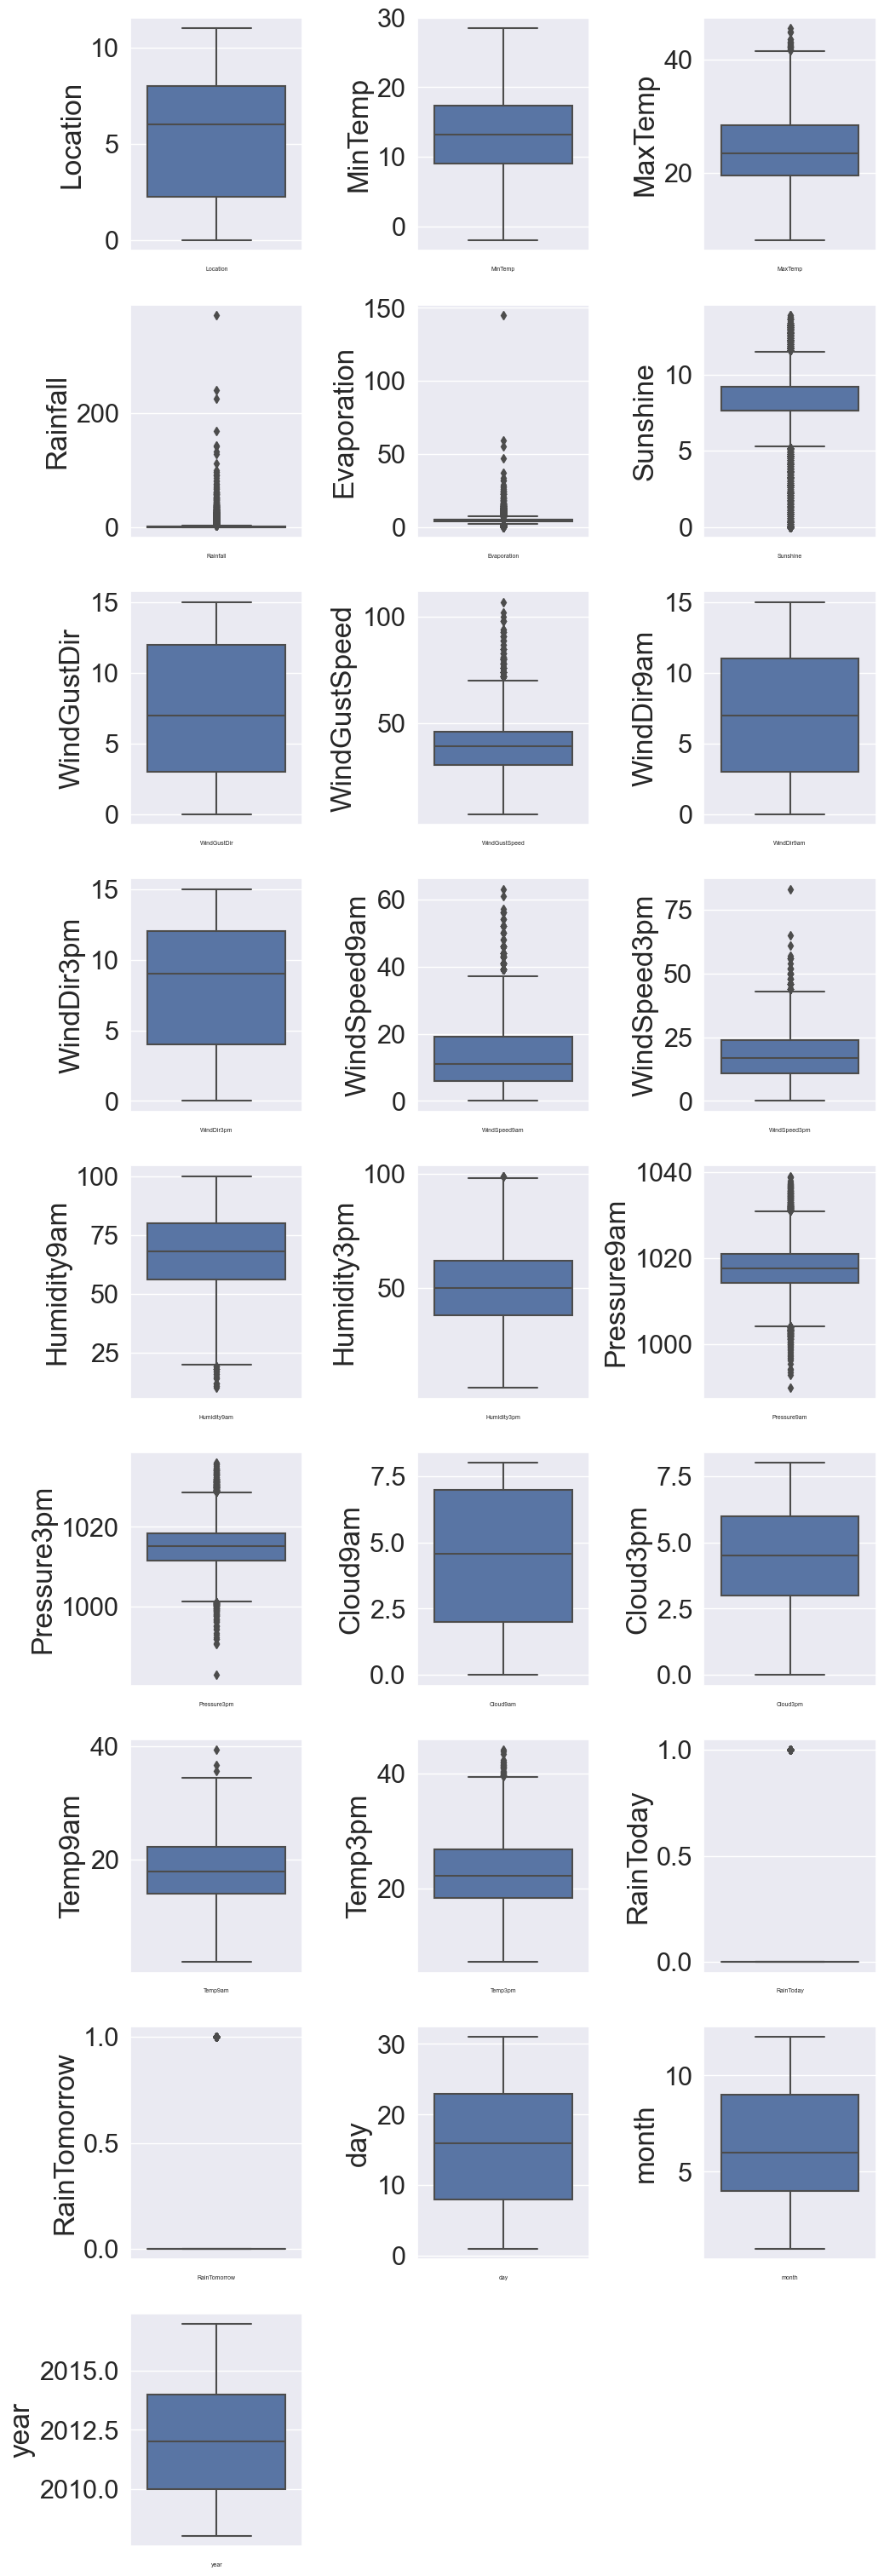

In [172]:
plt.figure(figsize=(10,30), facecolor='white')
plotnumber = 1
for column in df.columns: #column in features:
    if plotnumber<=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(y=column, data=df)
        plt.xlabel(column,fontsize=5)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above plotting we can see that there is many columns have outliers

So,We need to treat outliers

### Removing Outliers using Zscore

In [173]:
from scipy.stats import zscore
z=np.abs(zscore(df))
thershold=3
df_new=df[(z<3).all(axis=1)]
df_new.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1         44.0         25.0       1010.6       1007.8  4.566622  4.503183   
2         38.0         30.0       1007.6       1008.7  4.566622  2.000000   
3         45.0         16.0       1017.6       1012.8  4.566622  4.503183   
4         82.0         33.0       1010.8       1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8          0             0    1     12  2008  
1     17.2     24.3          0             0    2     12  2008  
2     21.0     23.2          0             0    3     12  2008  
3     18.1     26.5          0             0    4     12  2008  
4     17.8     29.7          0             0    5     12  2008

In [174]:
z.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  1.395097  0.052341  0.195170  0.208040     0.014779  0.049294     1.246744   
1  1.395097  1.030640  0.163738  0.265281     0.014779  0.049294     1.455523   
2  1.395097  0.037907  0.261622  0.265281     0.014779  0.049294     1.664301   
3  1.395097  0.705746  0.636844  0.265281     0.014779  0.049294     0.632264   
4  1.395097  0.792378  1.338345  0.169879     0.014779  0.049294     1.246744   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.362850    1.315650    1.372365      0.736444      0.671784   
1       0.362850    0.222688    1.595253      0.898312      0.462330   
2       0.512305    1.315650    1.595253      0.634272      0.881238   
3       1.131708    0.436600    1.748064      0.183106      0.899122   
4       0.138666    1.321500    0.187849      0.591796      0.252876   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0     0.203179     1.539598     1.647292     1.347736  1.453517  0.056332   
1     1.368283     1.377411     1.166162     1.230431  0.067188  0.056332   
2     1.717496     1.107100     1.663883     1.079611  0.067188  1.020514   
3     1.310080     1.863971     0.004812     0.392542  0.067188  0.056332   
4     0.843405     0.944913     1.132980     1.532071  1.049737  1.560632   

    Temp9am   Temp3pm  RainToday  RainTomorrow       day     month      year  
0  0.173722  0.151545   0.550355      0.550355  1.675969  1.639768  1.761148  
1  0.121292  0.267112   0.550355      0.550355  1.562245  1.639768  1.761148  
2  0.542811  0.082903   0.550355      0.550355  1.448521  1.639768  1.761148  
3  0.035995  0.635529   0.550355      0.550355  1.334798  1.639768  1.761148  
4  0.016434  1.171410   0.550355      0.550355  1.221074  1.639768  1.761148

In [175]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_new.shape)
print("Total Dropped rows:",df.shape[0]-df_new.shape[0])
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Old DataFrame data in Rows and Column: (6762, 25)
New DataFrame data in Rows and Column: (6409, 25)
Total Dropped rows: 353
Percentage of data loss post outlier removal:  5.220349009168885


### Percentage Data Loss using Zscore is 5.22  so acceptable

## Checking for the skewness

In [176]:
df_new.skew().sort_values()

Sunshine        -0.747742
Cloud9am        -0.279140
Humidity9am     -0.233515
Cloud3pm        -0.212402
WindDir3pm      -0.128886
MinTemp         -0.079583
Temp9am         -0.071954
Location         0.004558
day              0.004771
month            0.032770
Pressure9am      0.062576
Pressure3pm      0.077866
Humidity3pm      0.156591
WindGustDir      0.178714
WindDir9am       0.210848
MaxTemp          0.266849
Temp3pm          0.292131
WindSpeed3pm     0.336515
year             0.352924
WindGustSpeed    0.434313
Evaporation      0.666495
WindSpeed9am     0.673887
RainTomorrow     1.330358
RainToday        1.331440
Rainfall         3.514866
dtype: float64

### Observation:
- Skewness threshold taken is +/-0.50
- Columns which are having skewness:Evaporation,WindSpeed9am,RainTomorrow,RainToday,Rainfall

- The Sunshine column data is negatively highly skewed and RainFall is positively highly skewed.

- All the columns are not normally distributed, they are skewed.
- Since RainToday,RainTomorrow are  categorical column so we will not remove skewness from them and also Target Column so we will not remove skewness. 
- Only we will remove skewness from remaining column contains continuous data.

### Checking skweness through Data Visualization

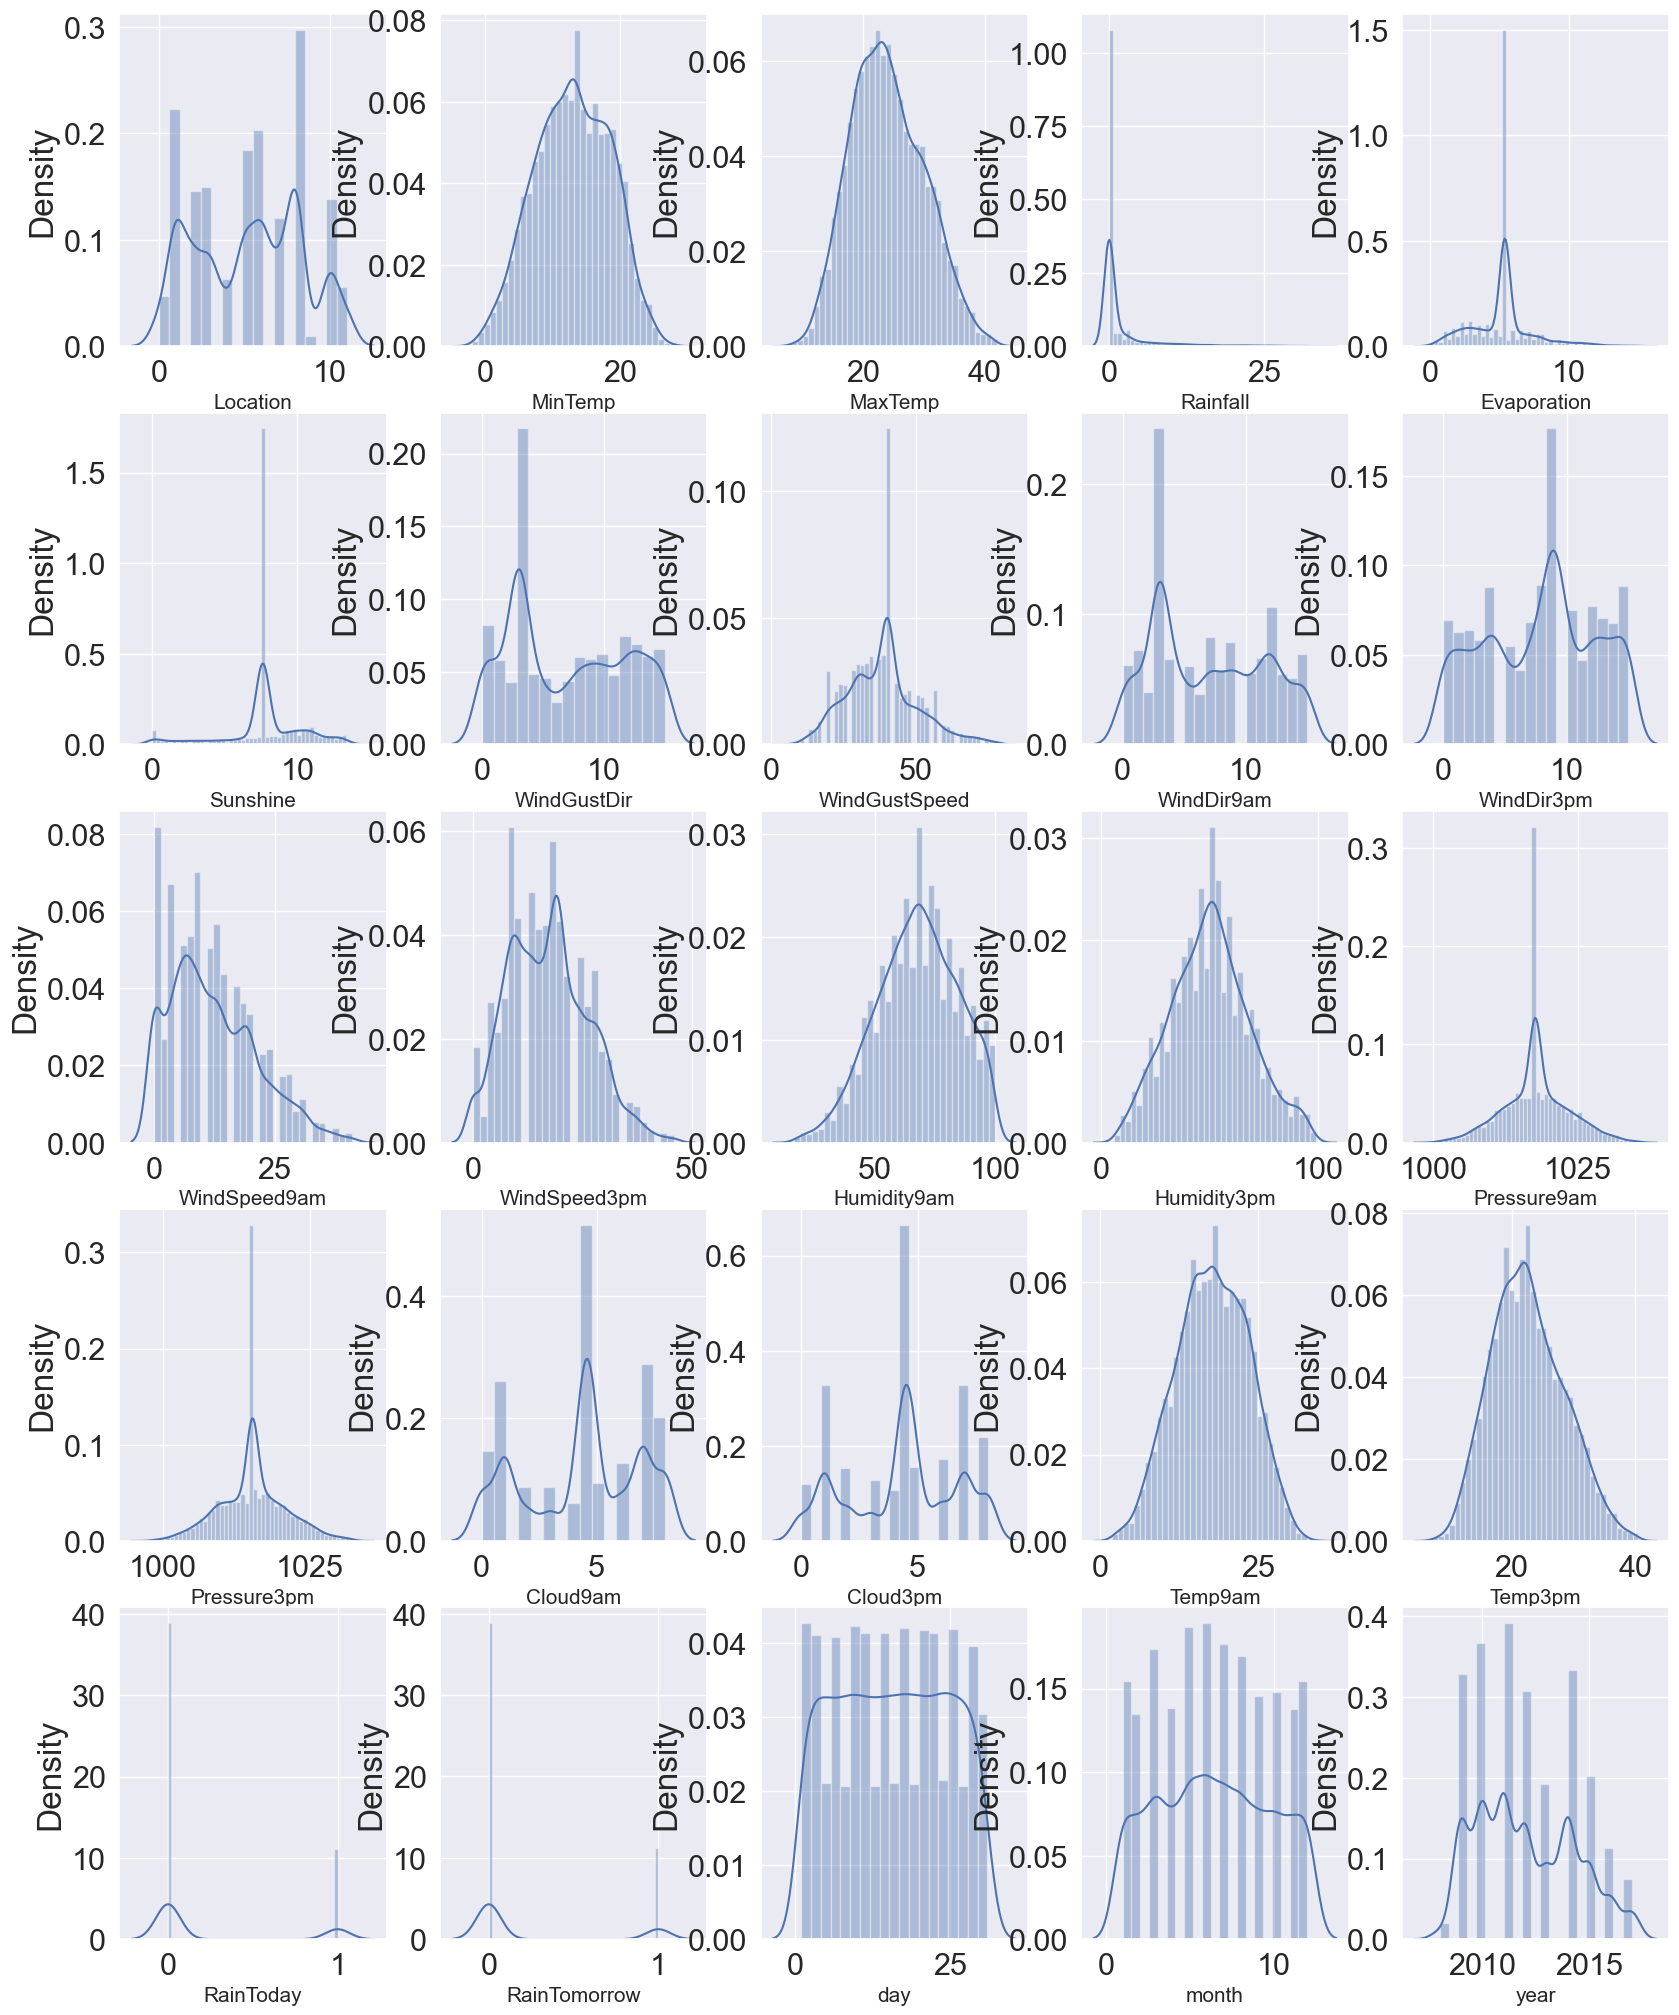

In [179]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new:
    if plotnumber<=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

### Data visualization of skewed continuous column using distplot

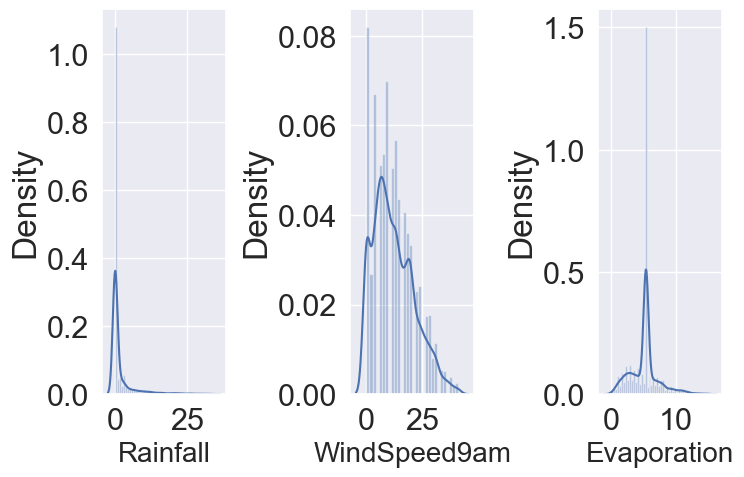

In [180]:
collist=['Rainfall',"WindSpeed9am","Evaporation"]
plt.figure(figsize=(8,5), facecolor='white')
plotnumber = 1

for column in df_new[collist]:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.subplots_adjust(wspace=1)
plt.show()

### Removing skewness

In [181]:
from sklearn.preprocessing import PowerTransformer

In [182]:
collist=['Rainfall',"WindSpeed9am","Evaporation"]
pt = PowerTransformer(method='yeo-johnson')
df_new[collist] = pt.fit_transform(df_new[collist])
df_new[collist]

Rainfall  WindSpeed9am  Evaporation
0     0.685440      0.904165     0.171997
1    -0.674930     -0.859874     0.171997
2    -0.674930      0.821577     0.171997
3    -0.674930      0.065993     0.171997
4     1.045239     -0.412396     0.171997
...        ...           ...          ...
8420 -0.674930      0.274378     0.171997
8421 -0.674930      0.274378     0.171997
8422 -0.674930     -0.160941     0.171997
8423 -0.674930      0.274378     0.171997
8424 -0.674930      0.649843     0.171997

[6409 rows x 3 columns]

In [183]:
df_new['Rainfall'] = np.cbrt(df_new['Rainfall'])
df_new["WindSpeed9am"] = np.cbrt(df_new["WindSpeed9am"])
df_new["Evaporation"] = np.cbrt(df_new["Evaporation"])

### checking skewness after removal

In [184]:
df_new.skew().sort_values()

Sunshine        -0.747742
Evaporation     -0.616941
Cloud9am        -0.279140
Humidity9am     -0.233515
Cloud3pm        -0.212402
WindDir3pm      -0.128886
MinTemp         -0.079583
Temp9am         -0.071954
WindSpeed9am    -0.071552
Location         0.004558
day              0.004771
month            0.032770
Pressure9am      0.062576
Pressure3pm      0.077866
Humidity3pm      0.156591
WindGustDir      0.178714
WindDir9am       0.210848
MaxTemp          0.266849
Temp3pm          0.292131
WindSpeed3pm     0.336515
year             0.352924
WindGustSpeed    0.434313
Rainfall         0.845732
RainTomorrow     1.330358
RainToday        1.331440
dtype: float64

In [186]:
cat_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

RainTomorrow and RainToday is categorial column so not to consider skewness

### checking skewness after removal through data visualization using distplot

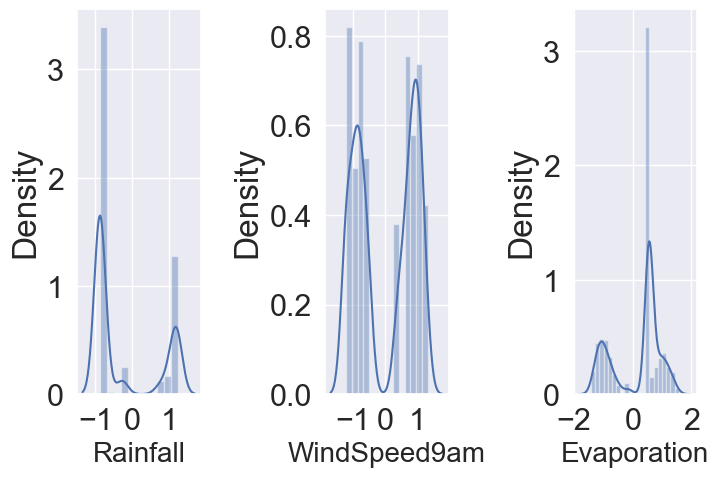

In [187]:
collist=['Rainfall',"WindSpeed9am","Evaporation"]
plt.figure(figsize=(8,5), facecolor='white')
plotnumber = 1

for column in df_new[collist]:
    if plotnumber<=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.subplots_adjust(wspace=1)
plt.show()

The data is not normal but the skewness has got removed compared to the old data.

## Data preprocessing

### Separating the features and label variables into x and y

In [188]:
x=df_new.drop("Rainfall",axis=1)
y=df_new["Rainfall"]

In [189]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [190]:
x.shape,y.shape

((6409, 24), (6409,))

In [191]:
y.value_counts()

-0.877175    4157
-0.276577     306
 0.735785     141
 1.164059     133
 0.881705      85
             ... 
 1.135349       1
 1.123321       1
 1.203699       1
 1.145300       1
 1.228092       1
Name: Rainfall, Length: 173, dtype: int64

## Scaling data using Standard Scaler

In [192]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [193]:
x.head()

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
0 -1.391396  0.069013 -0.190468     0.473238 -0.067646     1.248562   
1 -1.391396 -1.013984  0.174690     0.473238 -0.067646     1.457373   
2 -1.391396 -0.021237  0.274278     0.473238 -0.067646     1.666183   
3 -1.391396 -0.689085  0.656034     0.473238 -0.067646    -0.630732   
4 -1.391396  0.809061  1.369752     0.473238 -0.067646     1.248562   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.468774    1.317076    1.373685      1.042255      0.755017   
1       0.468774   -0.222676    1.596977     -1.072237      0.534451   
2       0.631846    1.317076    1.596977      1.008754      0.975583   
3      -1.161942    0.437218   -1.752399      0.421693     -0.899227   
4       0.224167   -1.322499   -0.189357     -0.844479      0.313885   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0     0.199453    -1.560200    -1.760338    -1.441102  1.468185  0.074091   
1    -1.395784    -1.395411    -1.253293    -1.317590  0.081898  0.074091   
2    -1.750281    -1.120763    -1.777822    -1.158788  0.081898 -1.003845   
3    -1.336701    -1.889778    -0.029393    -0.435358  0.081898  0.074091   
4     0.849364    -0.955974    -1.218325    -1.635194  1.064417  1.579912   

    Temp9am   Temp3pm  RainToday  RainTomorrow       day     month      year  
0 -0.162504 -0.148977  -0.535675     -0.535916 -1.672284  1.655296 -1.770498  
1 -0.109750  0.277068  -0.535675     -0.535916 -1.558519  1.655296 -1.770498  
2  0.558474  0.089608  -0.535675     -0.535916 -1.444754  1.655296 -1.770498  
3  0.048514  0.651988  -0.535675     -0.535916 -1.330989  1.655296 -1.770498  
4 -0.004241  1.197325  -0.535675     -0.535916 -1.217224  1.655296 -1.770498

## Variance Threshold Method

It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

## SelectKBest method

In [194]:
from sklearn.feature_selection import  SelectKBest, f_classif

In [195]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [196]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(25,'Score'))

          Feature         Score
19      RainToday  4.562257e+15
11    Humidity9am  9.807028e+00
12    Humidity3pm  8.896820e+00
20   RainTomorrow  6.789955e+00
15       Cloud9am  5.251506e+00
4        Sunshine  4.824177e+00
16       Cloud3pm  4.307657e+00
18        Temp3pm  3.985365e+00
2         MaxTemp  3.738796e+00
3     Evaporation  2.423198e+00
7      WindDir9am  1.988473e+00
13    Pressure9am  1.942442e+00
10   WindSpeed3pm  1.814420e+00
5     WindGustDir  1.804236e+00
6   WindGustSpeed  1.726304e+00
17        Temp9am  1.713830e+00
9    WindSpeed9am  1.604307e+00
23           year  1.507099e+00
14    Pressure3pm  1.387570e+00
1         MinTemp  1.361975e+00
8      WindDir3pm  1.209797e+00
22          month  1.056147e+00
0        Location  1.040989e+00
21            day  1.028070e+00


In [197]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

Now, we have completed features selection process through above techniques. So, will check for multicolinearity now.

## Checking for Multicolinearity

### VIF (Variance Inflation factor)

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [199]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif.sort_values(by='VIF values', inplace=True)
vif

VIF values       Features
21    1.004952            day
22    1.144234          month
7     1.337788     WindDir9am
19    1.403362      RainToday
20    1.471122   RainTomorrow
8     1.474223     WindDir3pm
3     1.482773    Evaporation
23    1.565121           year
5     1.640113    WindGustDir
0     1.662263       Location
9     1.842273   WindSpeed9am
16    1.916319       Cloud3pm
10    1.928382   WindSpeed3pm
15    2.011979       Cloud9am
4     2.050705       Sunshine
6     2.179760  WindGustSpeed
11    4.040127    Humidity9am
12    5.721632    Humidity3pm
1     9.251855        MinTemp
17   18.203675        Temp9am
14   19.509069    Pressure3pm
13   20.265938    Pressure9am
2    26.439575        MaxTemp
18   32.801059        Temp3pm

After many hit and trial methods we came to know that we have to drop three columns so that every VIF value comes under the acceptance range. Those three columns are MaxTemp,Temp3pm and Temp9am.

In [200]:
x.drop(['Pressure9am','Temp9am','Temp3pm',"MaxTemp","Pressure3pm",],axis=1,inplace=True)

### Removing VIF

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif.sort_values(by='vif', inplace=True)
vif

Features       vif
16            day  1.002436
17          month  1.110762
6      WindDir9am  1.272538
14      RainToday  1.349357
2     Evaporation  1.402366
7      WindDir3pm  1.402637
1         MinTemp  1.417683
15   RainTomorrow  1.445990
18           year  1.552319
4     WindGustDir  1.603676
0        Location  1.652103
8    WindSpeed9am  1.752849
9    WindSpeed3pm  1.870191
13       Cloud3pm  1.894161
12       Cloud9am  1.944607
3        Sunshine  1.968892
5   WindGustSpeed  2.019954
11    Humidity3pm  2.328736
10    Humidity9am  2.503478

__No Multi-collinearaity is present in columns. So, we will create model now.__

# Creating Model

#### Finding the best random state among all the models

In [202]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("best accuracy/r2 score is ",maxAccu,"on Random_state ",maxRS)

best accuracy/r2 score is  0.7634235320386611 on Random_state  37


Maximum r2 score is 76.34% and random state is 37

In [203]:
models=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),SGDRegressor(),GradientBoostingRegressor(), SVR()]

In [205]:
for m in models:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('For',m)
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x,y,cv=5)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*99)

For LinearRegression()
R2 score : 0.7422889591112071
Mean absolute error:  0.28151155650130616
Mean squared error:  0.21444523279232114
Cross Validation Score= 0.732125723115245 

***************************************************************************************************
For RandomForestRegressor()
R2 score : 0.7612782979907535
Mean absolute error:  0.251492598187008
Mean squared error:  0.1986439183334896
Cross Validation Score= 0.7153958998223074 

***************************************************************************************************
For KNeighborsRegressor()
R2 score : 0.6842781572249802
Mean absolute error:  0.2788473829202867
Mean squared error:  0.26271689345558813
Cross Validation Score= 0.6732336715495462 

***************************************************************************************************
For DecisionTreeRegressor()
R2 score : 0.5434201515120753
Mean absolute error:  0.2532485798562643
Mean squared error:  0.3799269583468341
Cross Validatio

As per r2score and cross validation score , Random forest regressor and Gradient boosting regressor are working the best so we will be using Gradient boosting regressor for this as it has a bit high accuracy ons seen (r2 score) and unseen (cross val score) data.

## Hyperparameter Tuning 

In [206]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
gcs=GridSearchCV(GradientBoostingRegressor(),param,cv=5,n_jobs=-1)
gcs.fit(x_train,y_train)
gcs.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [207]:
fmodel_reg=GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,min_samples_leaf= 4,
min_samples_split= 10,max_depth=5)
fmodel_reg.fit(x_train,y_train)
pred2=fmodel_reg.predict(x_test)
acc=r2_score(y_test,pred2)
print(acc*100)

76.25245365739057


## Plotting the best fit line

Text(0.5, 1.0, 'Best Fit Line')

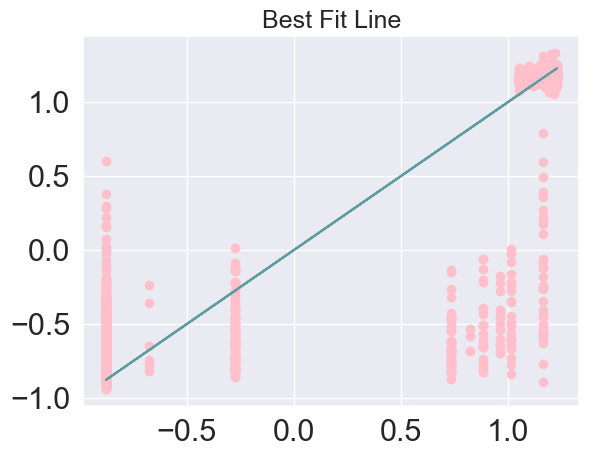

In [209]:
plt.scatter(x=y_test,y=pred2,color='pink')
plt.plot(y_test,y_test,color='cadetblue')
plt.title('Best Fit Line',fontsize=18)

## Saving the final model

In [210]:
# Saving the model using .pkl
import joblib
joblib.dump(fmodel_reg,"Rainfall_prediction.pkl")

['Rainfall_prediction.pkl']

In [213]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

In [214]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [215]:
testing_data_prediction = model.predict(x_test)

In [216]:
from sklearn import metrics
score = metrics.r2_score(y_test,testing_data_prediction)
score

0.7629640709094557

In [218]:
x.head(2)

Location   MinTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0 -1.391396  0.069013     0.473238 -0.067646     1.248562       0.468774   
1 -1.391396 -1.013984     0.473238 -0.067646     1.457373       0.468774   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0    1.317076    1.373685      1.042255      0.755017     0.199453   
1   -0.222676    1.596977     -1.072237      0.534451    -1.395784   

   Humidity3pm  Cloud9am  Cloud3pm  RainToday  RainTomorrow       day  \
0    -1.560200  1.468185  0.074091  -0.535675     -0.535916 -1.672284   
1    -1.395411  0.081898  0.074091  -0.535675     -0.535916 -1.558519   

      month      year  
0  1.655296 -1.770498  
1  1.655296 -1.770498

In [219]:
df.head(2)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1  8.000000  4.503183   
1         44.0         25.0       1010.6       1007.8  4.566622  4.503183   

   Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0     16.9     21.8          0             0    1     12  2008  
1     17.2     24.3          0             0    2     12  2008

In [225]:
#BULDING THE PREDICTION SYSTEM
input_data = (1,13.4,5.38,7.63,13,44,13,14,20,24,81,32,8,4.50,0,0,1,12,2008)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Average Price : ',str(prediction))

Predicted Average Price :  [0.40954451]


#### actual value=0.60mm but predicted rainfall = 0.41mm .  variation due to model  accuracy is 76.29% 

### Predicting the saved model

In [226]:
# Loading the saved model
model=joblib.load("Rainfall_prediction.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([ 1.13632121, -0.56760417, -0.11408247, ..., -0.77327766,
       -0.23123519, -0.1234874 ])

In [228]:
hs= joblib.load(open('Rainfall_prediction.pkl', 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

76.25245365739057


In [231]:
import numpy as np
a=np.array(y_test)
predicted=np.array(model.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))
df_com.head(9)

original  predicted
0  1.129631   1.136321
1 -0.276577  -0.567604
2 -0.276577  -0.114082
3 -0.877175  -0.848677
4 -0.276577  -0.738207
5 -0.877175  -0.789646
6 -0.877175  -0.707668
7 -0.877175  -0.891382
8  1.078925   1.133962

Original and Predicted values are nearly close.

In [232]:
model =df_com.to_csv('Rainfall_prediction.csv')
model

##### Model Prediction saved in CSV format

## thank you